<a href="https://colab.research.google.com/github/Salma-yossef-analytics/Covid-analysis/blob/main/Copy_of_%D9%86%D9%87%D8%A7%D8%A6%D9%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pandas as pd

# تحميل بيانات كوفيد من المصدر الرسمي
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# عرض أول 5 صفوف للتأكد من التحميل
df.head()

to_remove = [
    "Africa",
    "Asia",
    "Europe",
    "World",
    "European Union (27)",
    "Oceania",
    "North America",
    "South America",
    "N" "High_income countries",
    "Upper_middle_income_countries",
    "Lower_middle_income_countries",
]


df = df[~df["location"].isin(to_remove)]

df_date_sorted = df.sort_values("date")

df_last_loc = df_date_sorted.drop_duplicates("location", keep="last")


df_top_ten = df_last_loc[["location", "total_deaths"]].dropna().sort_values(ascending=False, by="total_deaths").head(10)

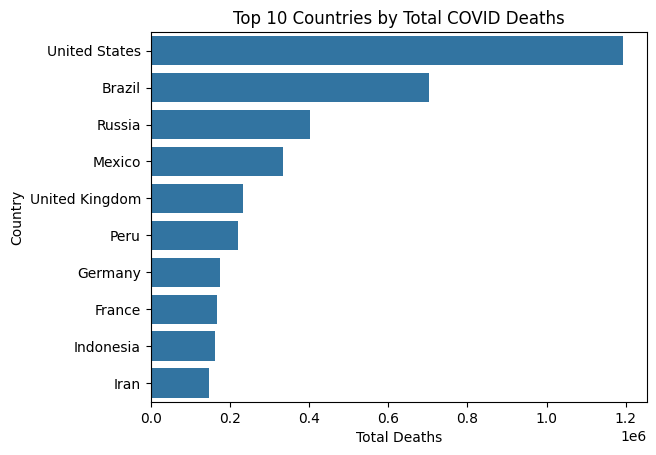

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data = df_top_ten, x='total_deaths', y='location')
plt.title('Top 10 Countries by Total COVID Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

In [ ]:
df[["location","total_deaths","total_cases"]].isnull().sum()

,0
location,0
total_deaths,16244
total_cases,16244


In [ ]:
df = df.dropna(subset=["location", "total_deaths", "total_cases"])

In [ ]:
df[["location","total_deaths","total_cases"]].isnull().sum()

,0
location,0
total_deaths,0
total_cases,0


In [ ]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,death_rate
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(398412, 68)

In [ ]:
df['death_rate'].dtypes

dtype('float64')

In [ ]:
df[['location','date']].duplicated().sum()

np.int64(0)

In [ ]:
df_peak_death_rate = df.sort_values('death_rate', ascending=False).drop_duplicates('location')

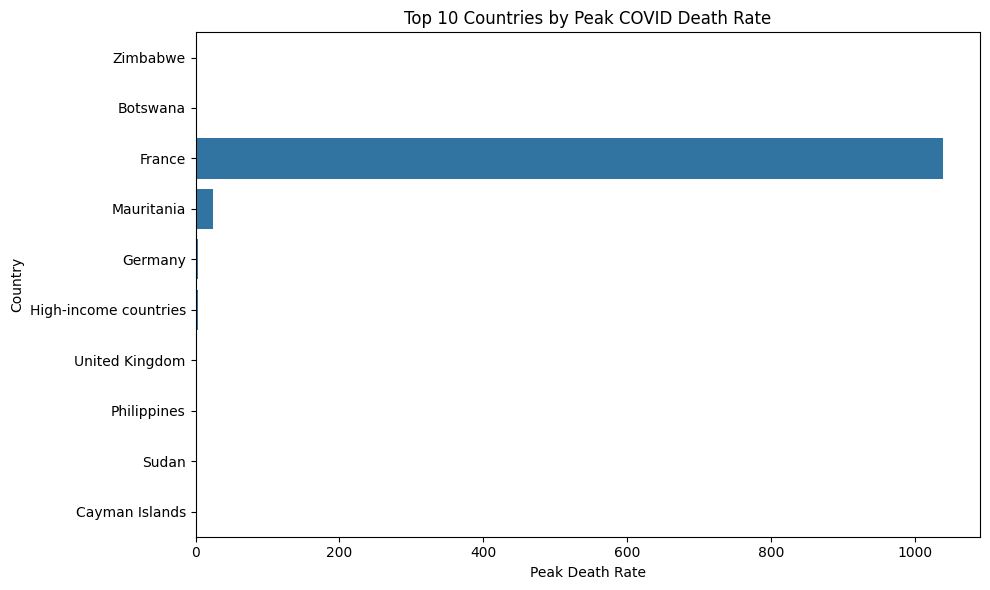

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# اختاري أعلى 10 دول
top10_peak = df_peak_death_rate.sort_values(by='death_rate', ascending=False).head(10)

# الرسم
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_peak, x='death_rate', y='location')
plt.title('Top 10 Countries by Peak COVID Death Rate')
plt.xlabel('Peak Death Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
df['death_rate'].isnull().sum()

np.int64(29143)

In [ ]:
df = df.dropna(subset = 'death_rate')

In [ ]:
df['death_rate'].isnull().sum()

np.int64(0)

In [ ]:
df = df[df["death_rate"] != float('inf')]

In [ ]:
df = df[df["death_rate"] < 1]  # إذا كان في قيم غير منطقية مثل 3 أو 5، بتشيليها

In [ ]:
df['date'].dtype

dtype('O')

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

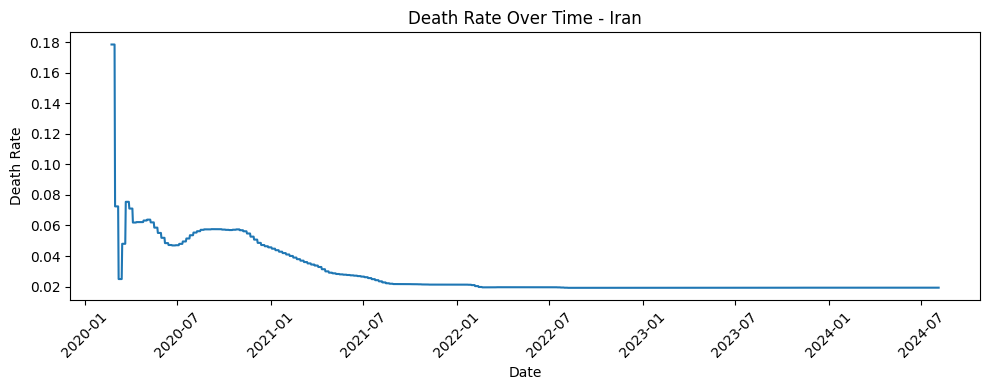

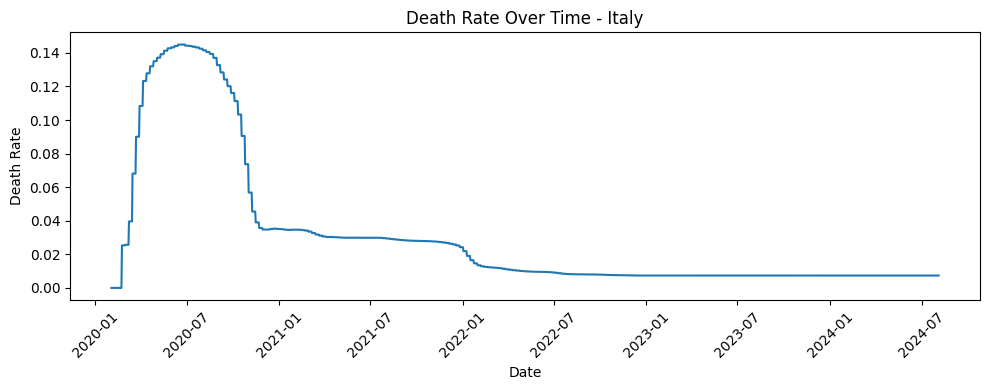

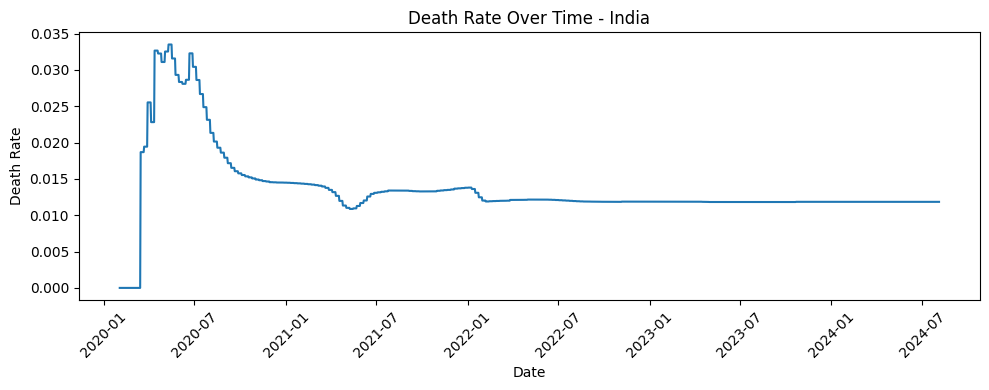

In [ ]:
selected_countries = ['Iran', 'Italy', 'India']
for country in selected_countries:
    df_country = df[df["location"] == country]
    plt.figure(figsize=(10, 4))
    plt.plot(df_country["date"], df_country["death_rate"], label=country)
    plt.title(f'Death Rate Over Time - {country}')
    plt.xlabel('Date')
    plt.ylabel('Death Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

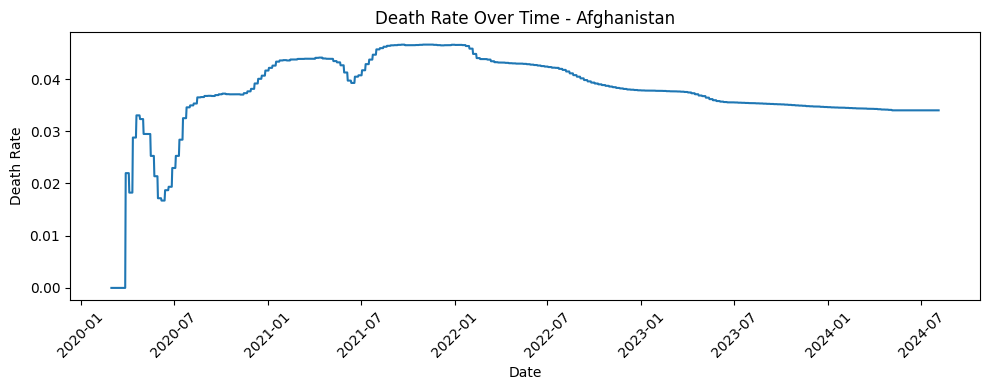

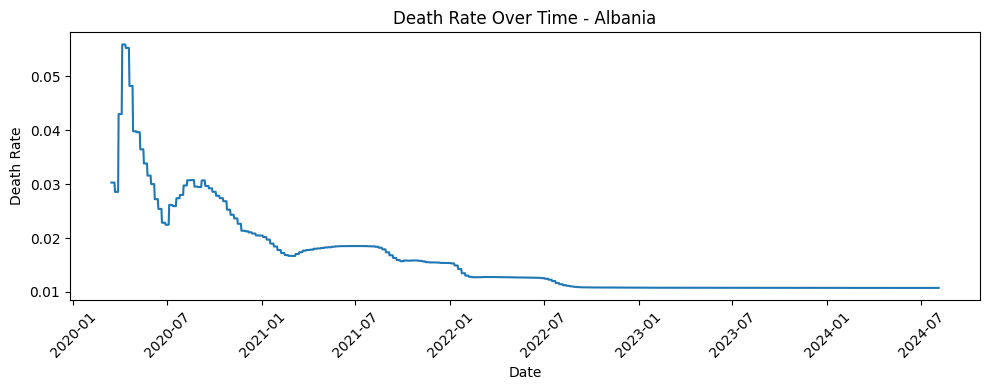

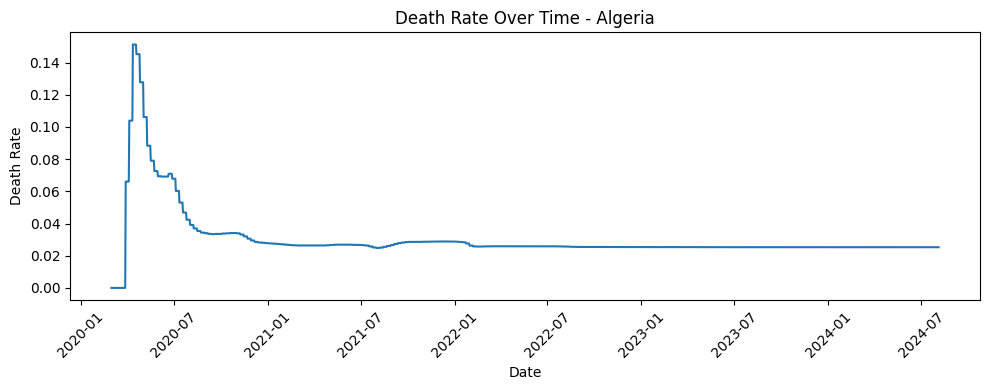

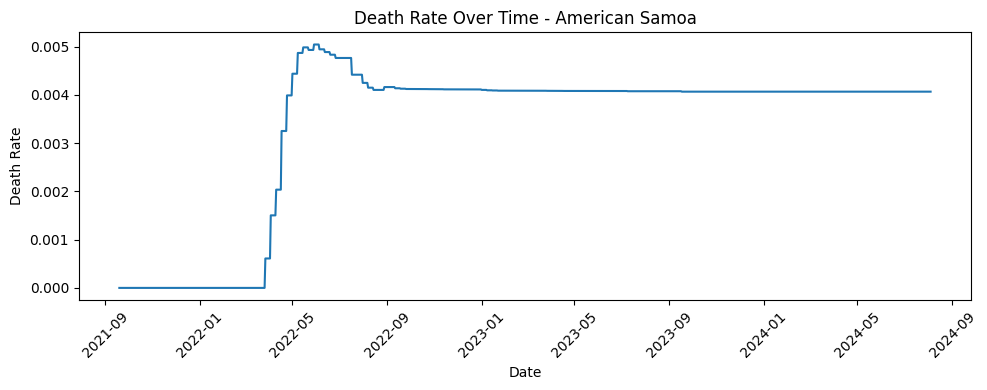

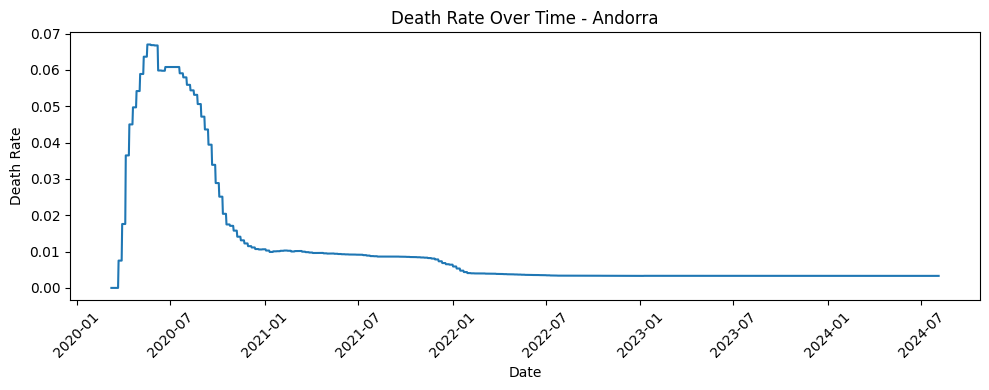

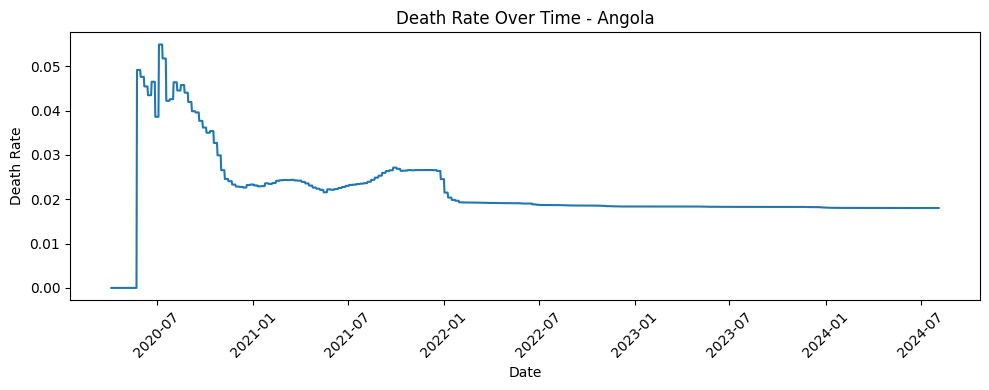

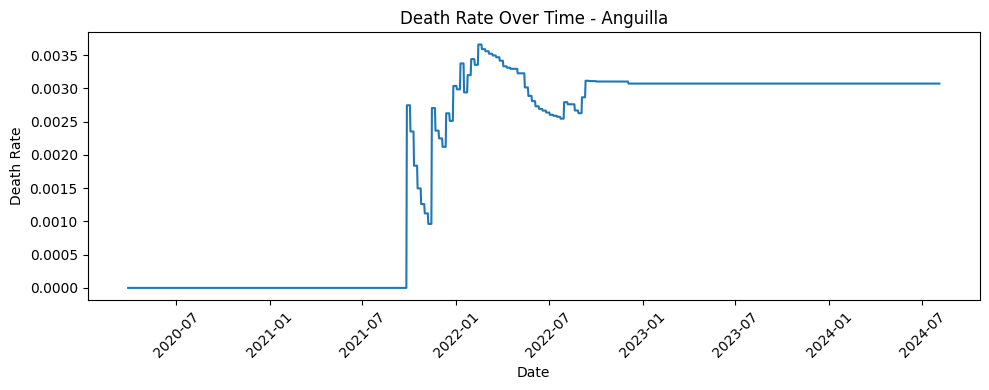

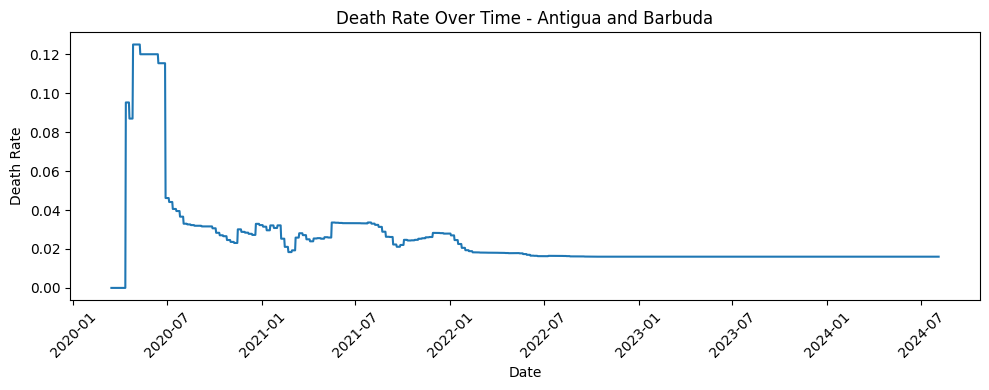

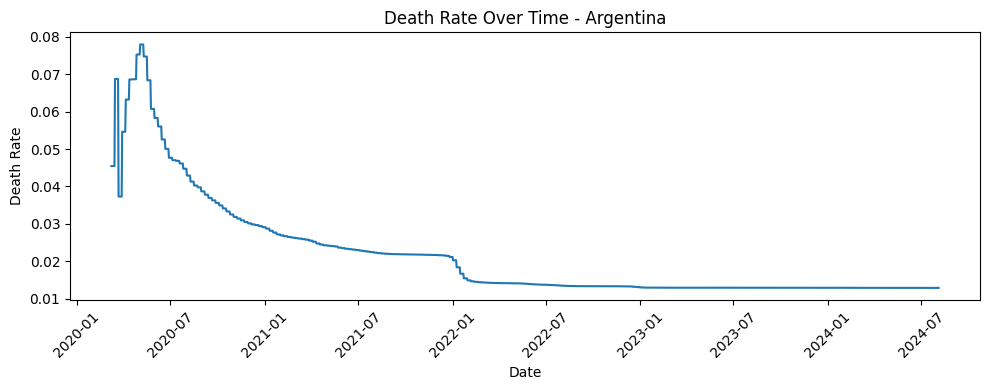

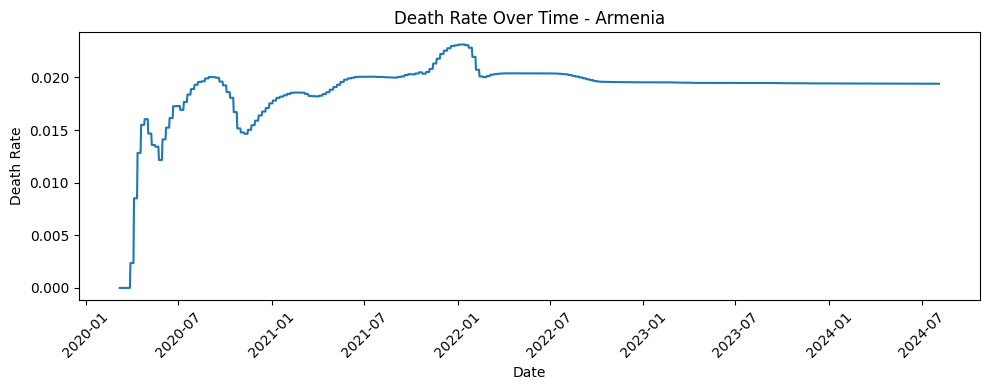

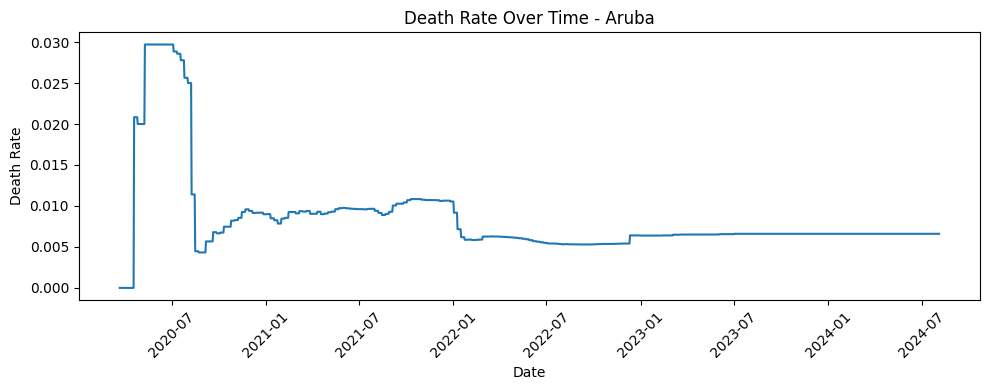

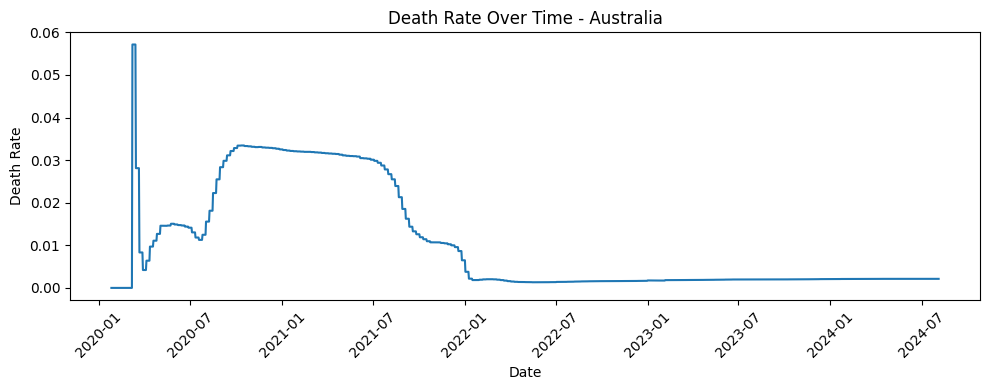

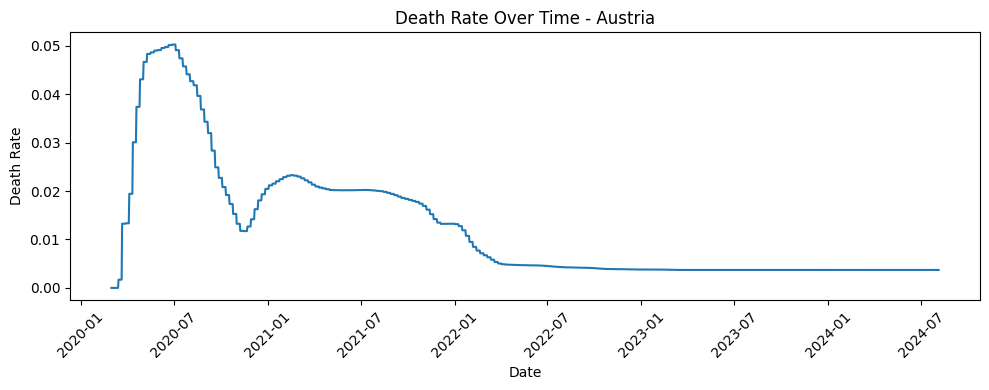

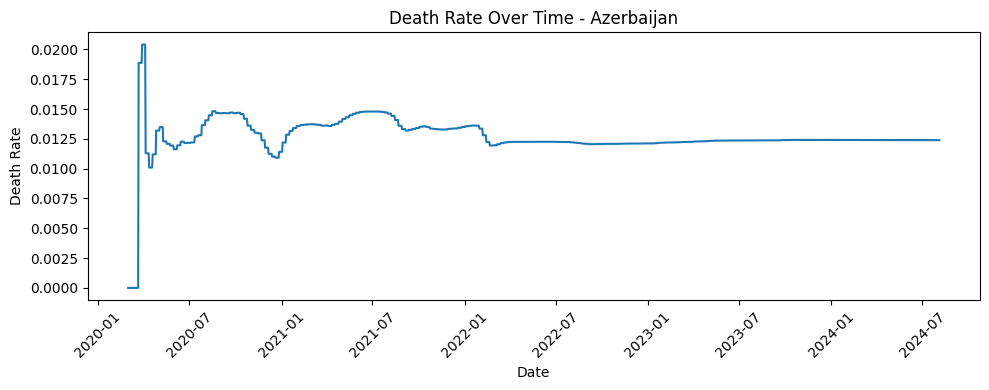

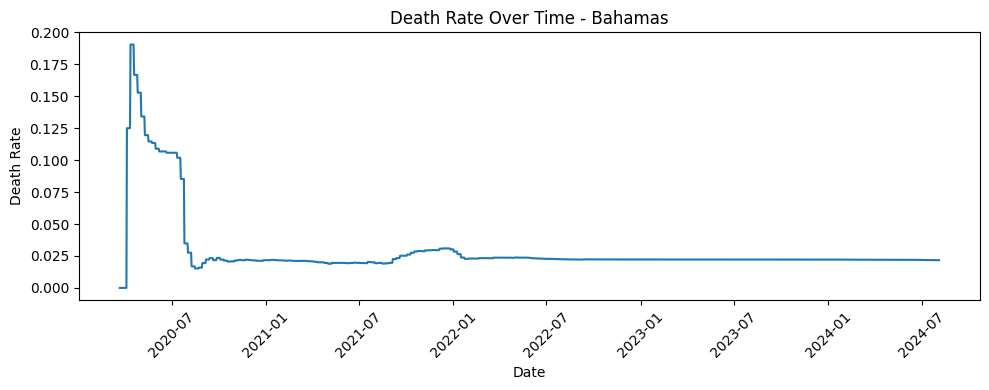

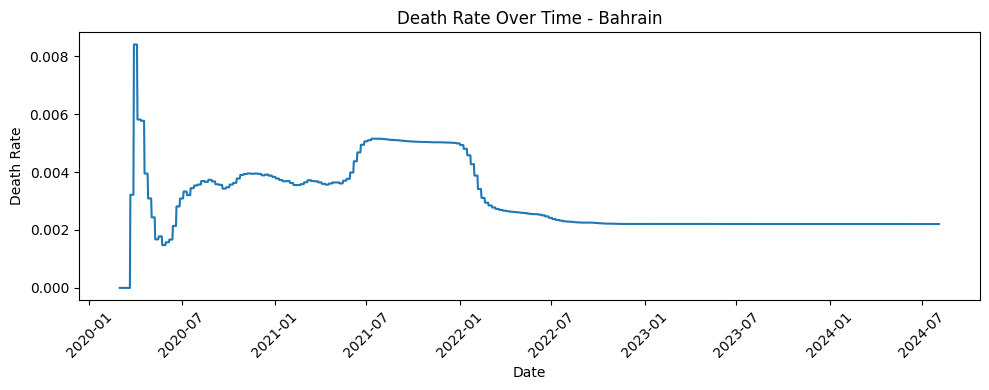

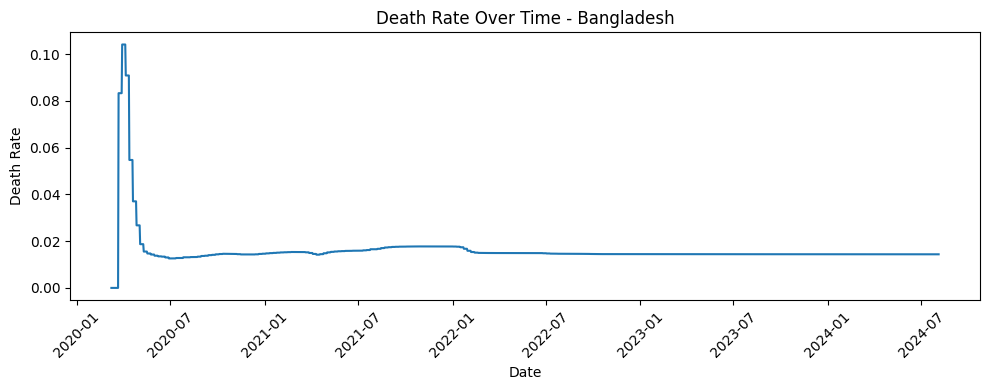

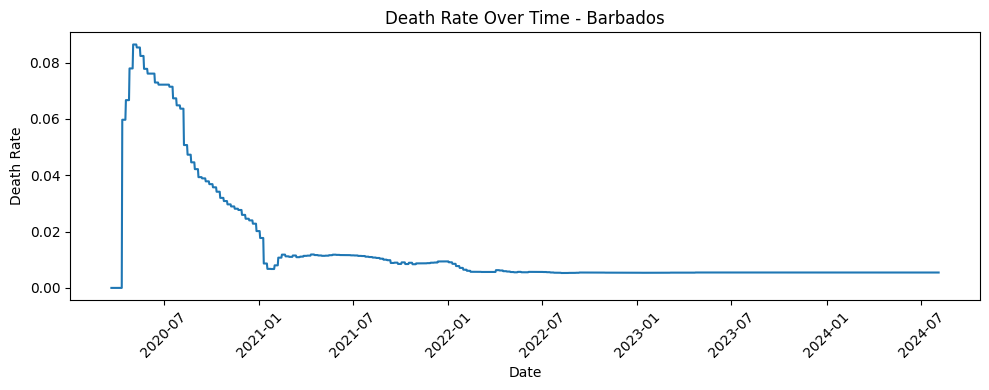

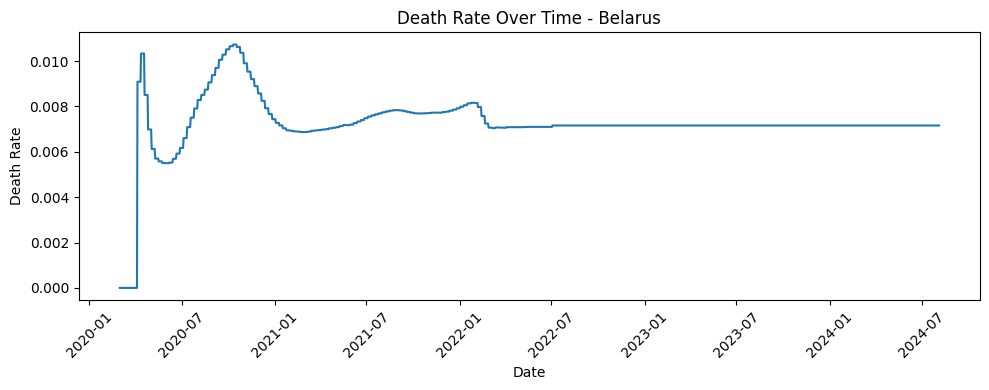

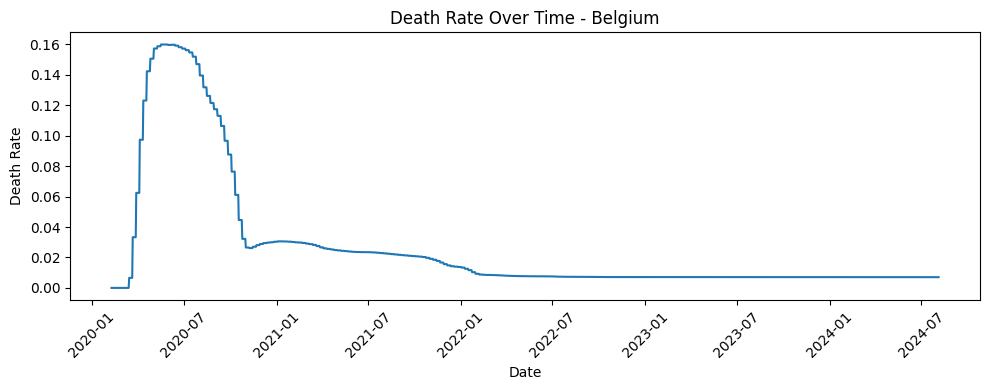

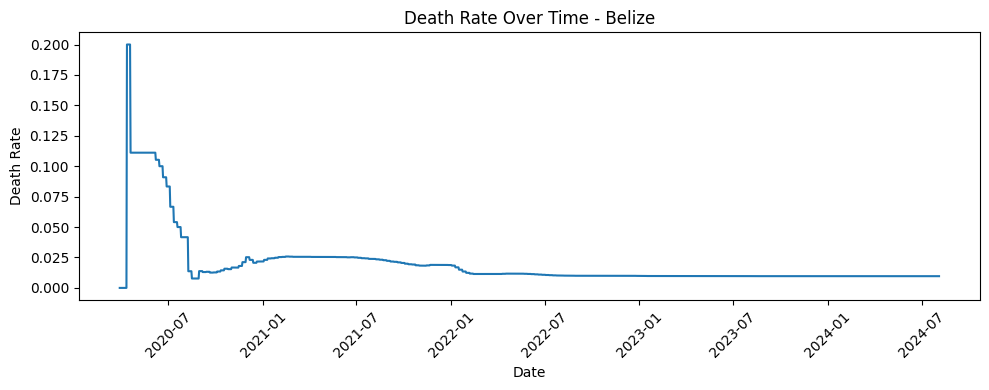

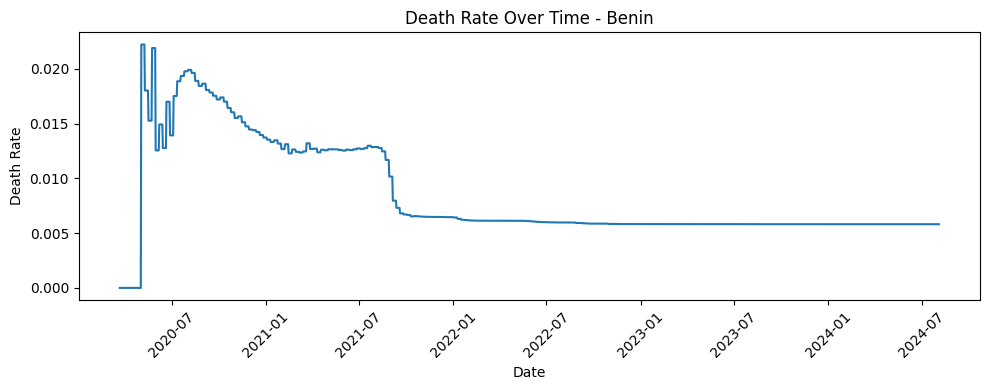

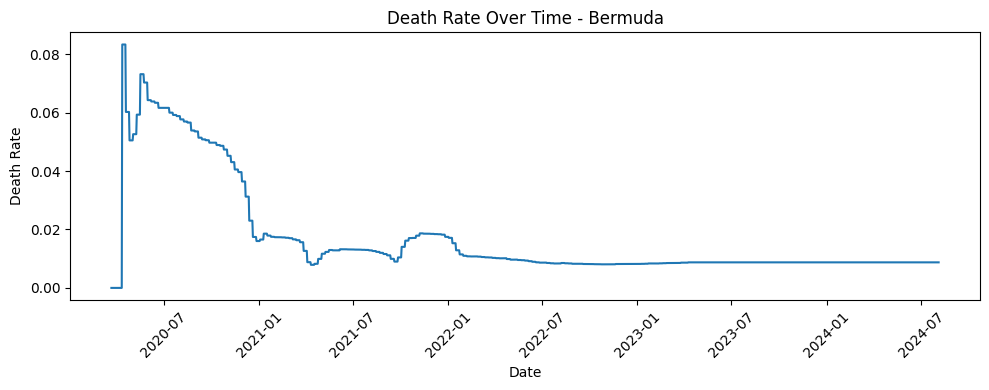

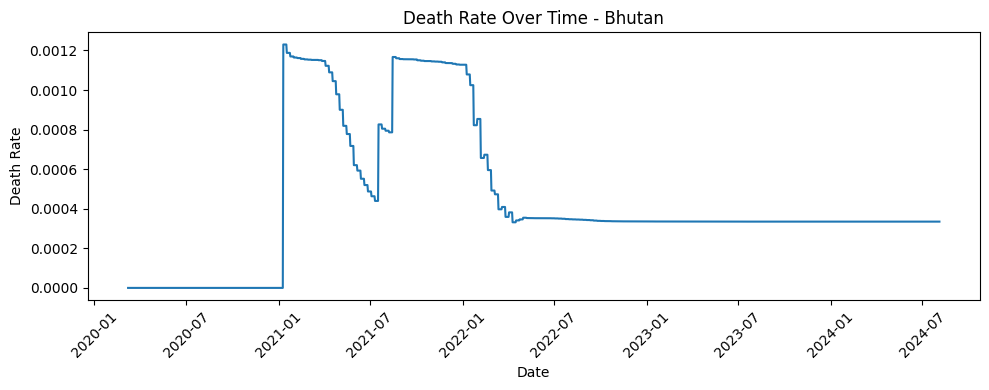

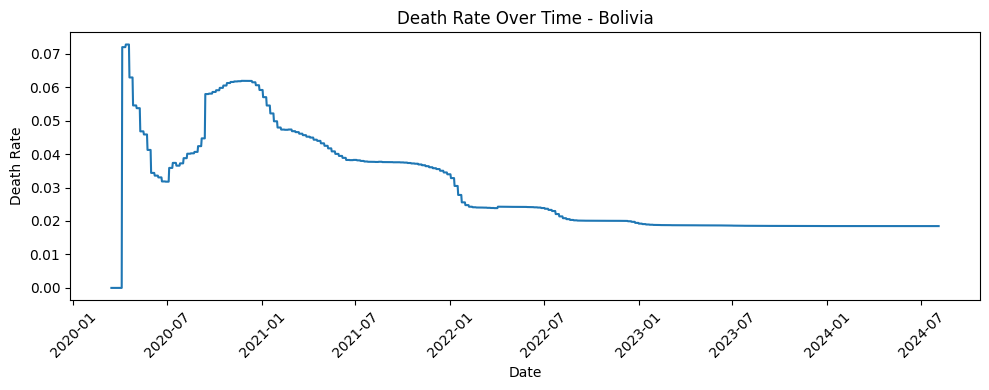

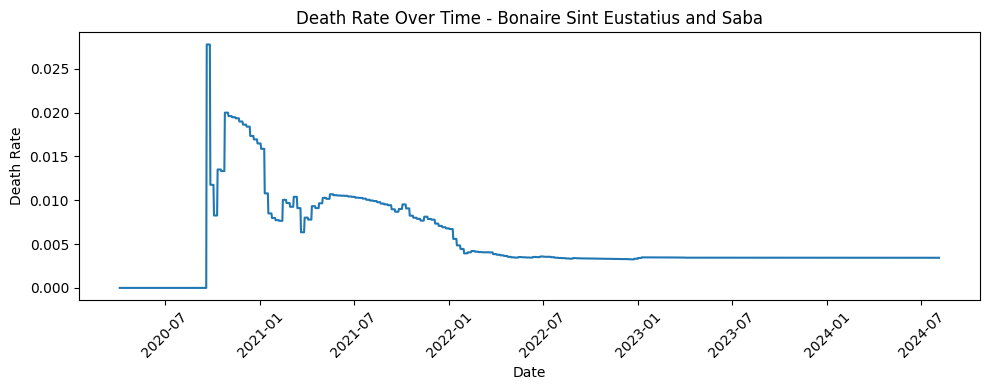

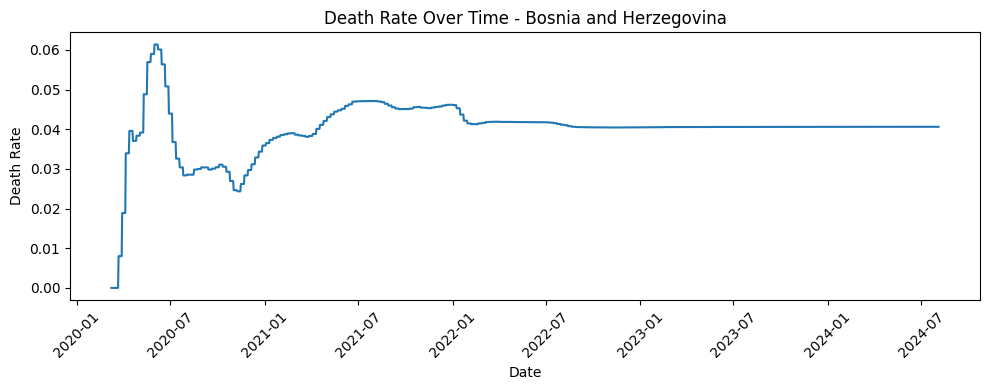

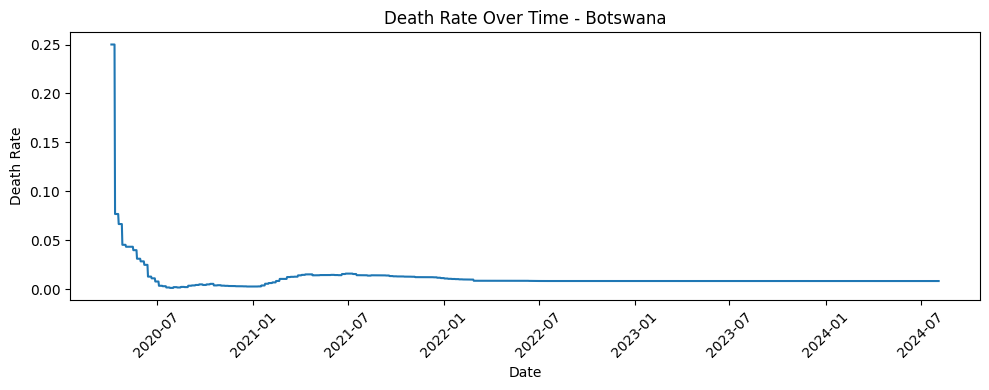

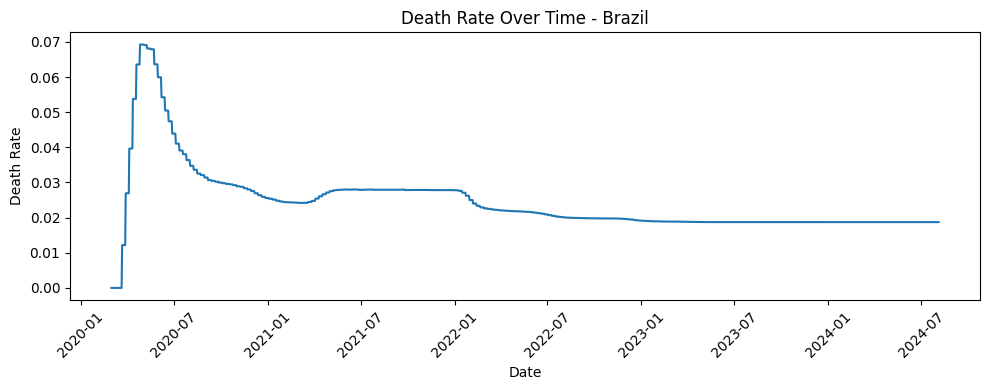

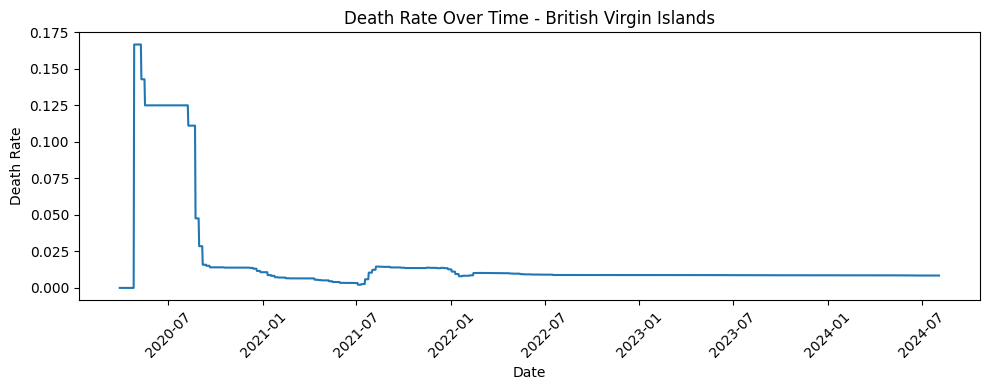

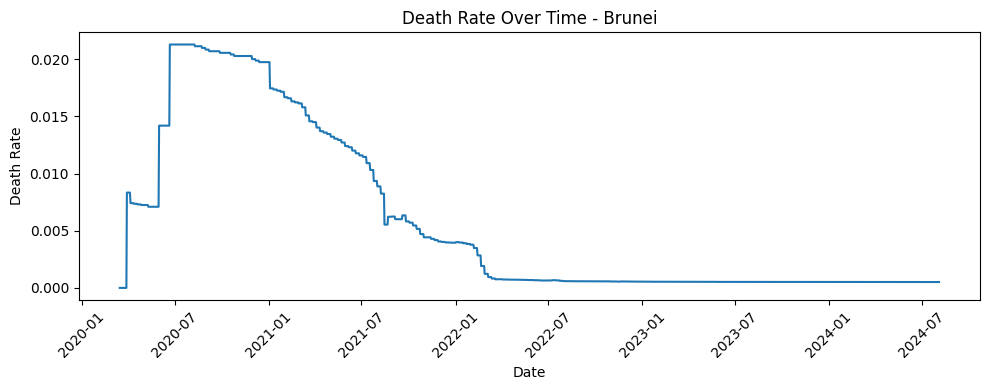

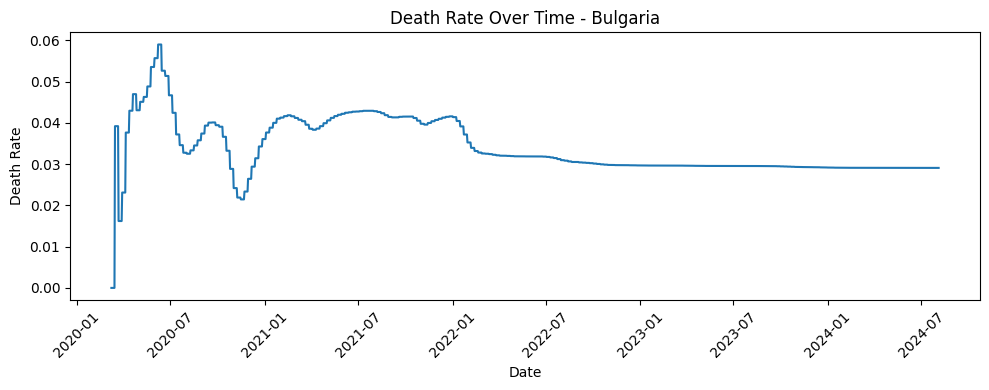

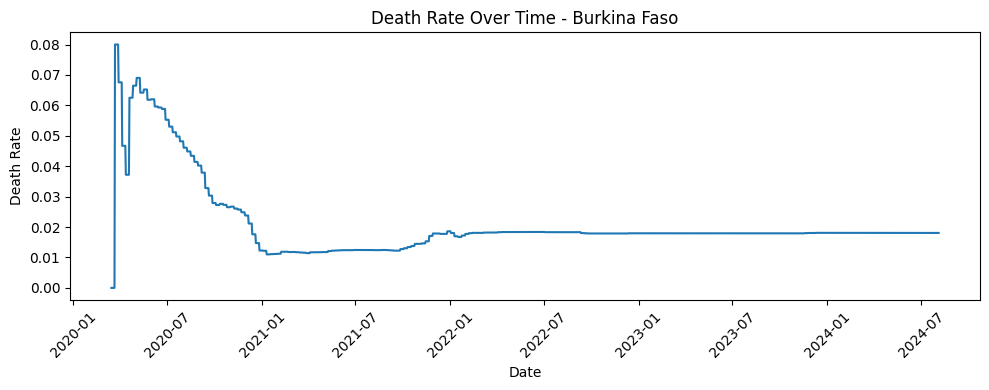

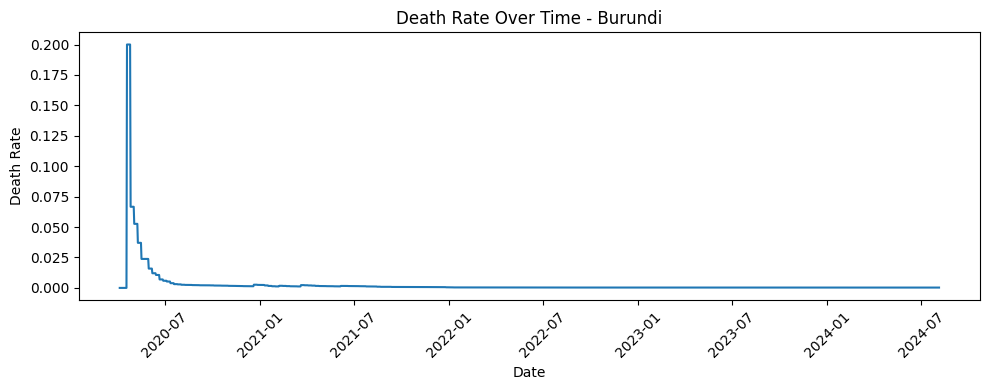

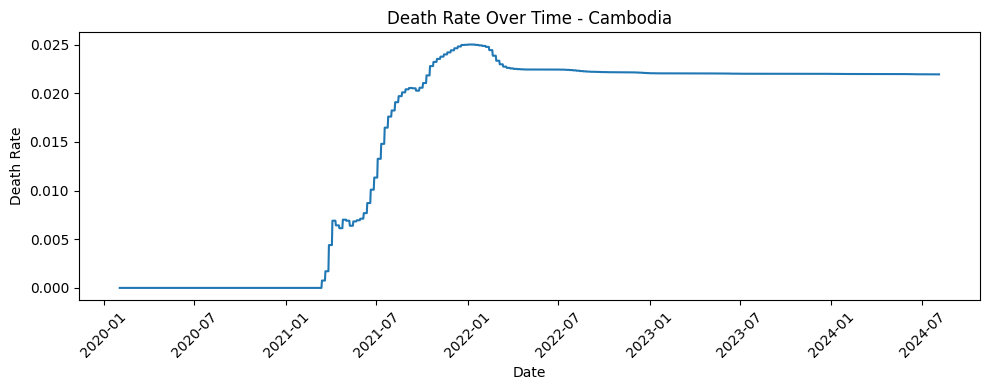

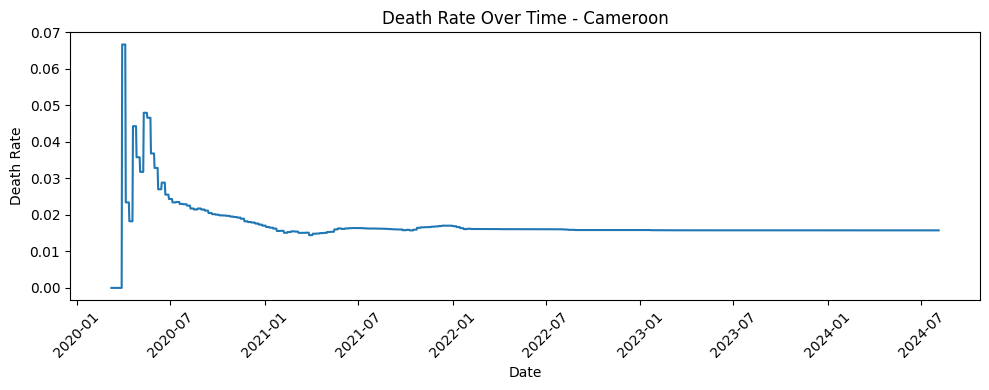

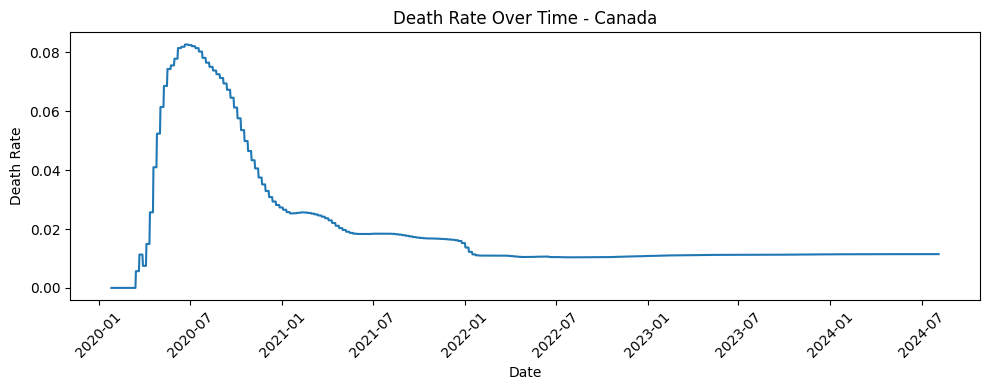

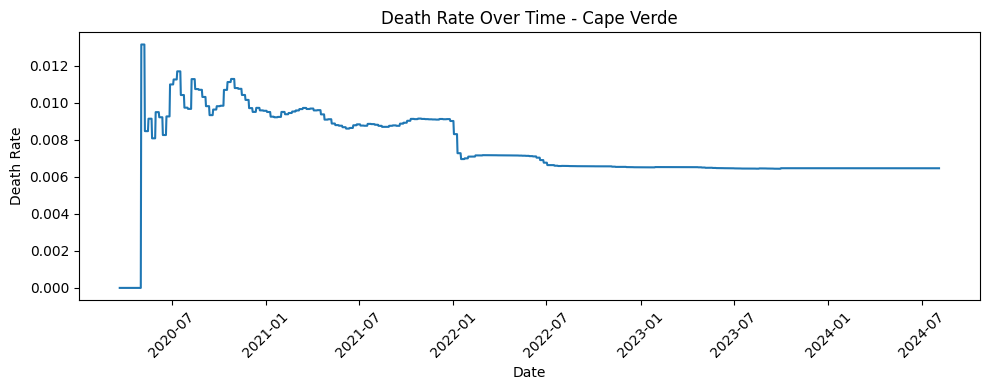

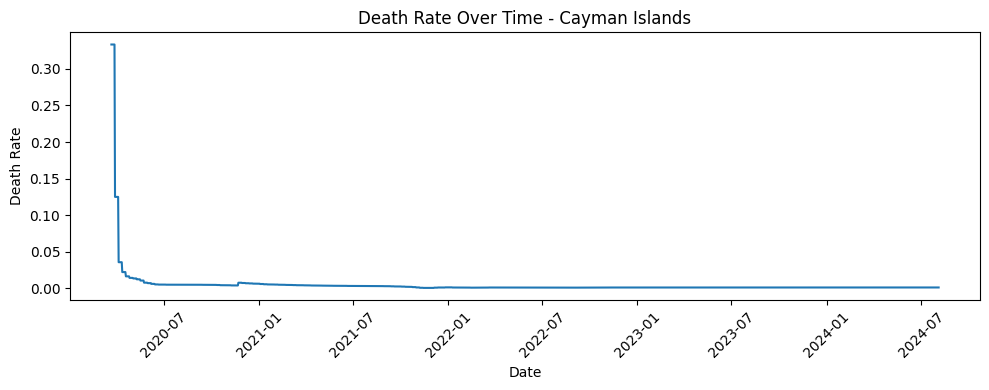

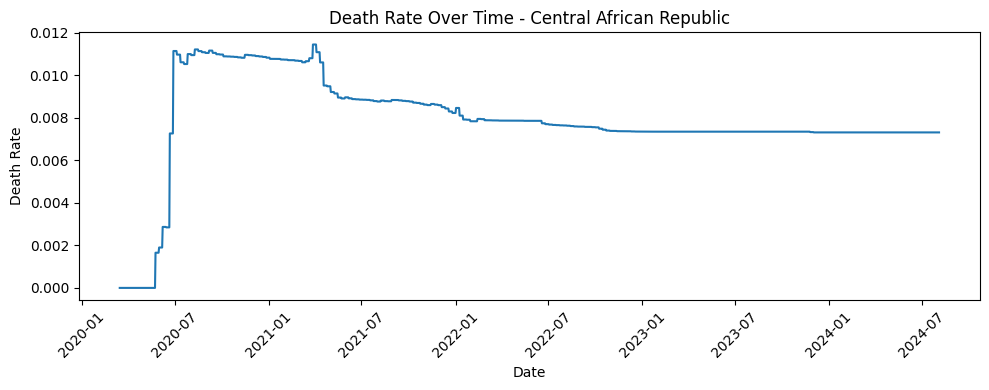

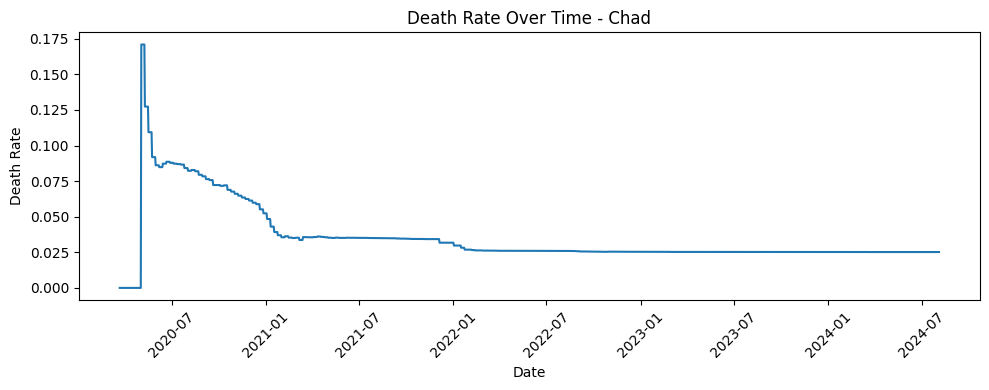

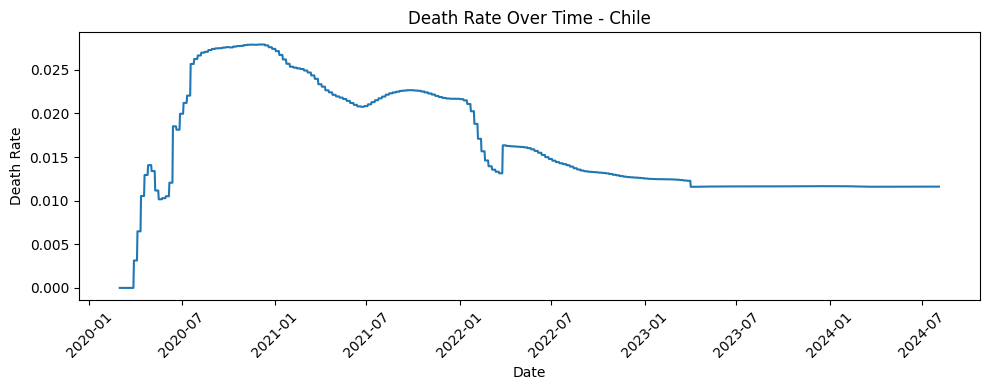

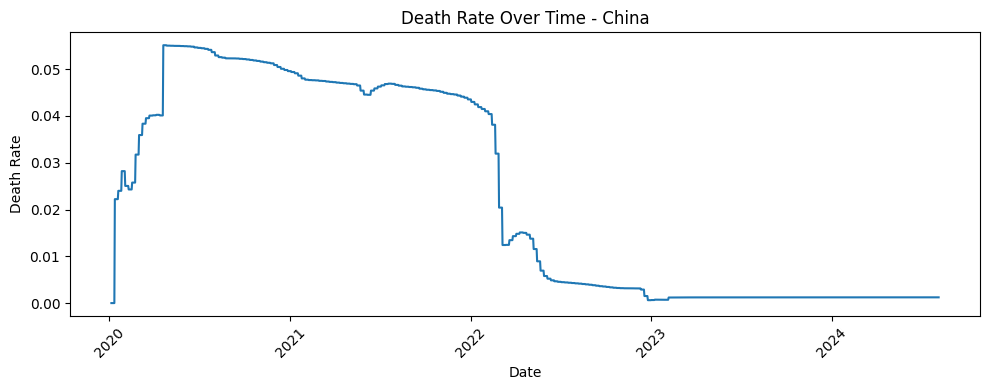

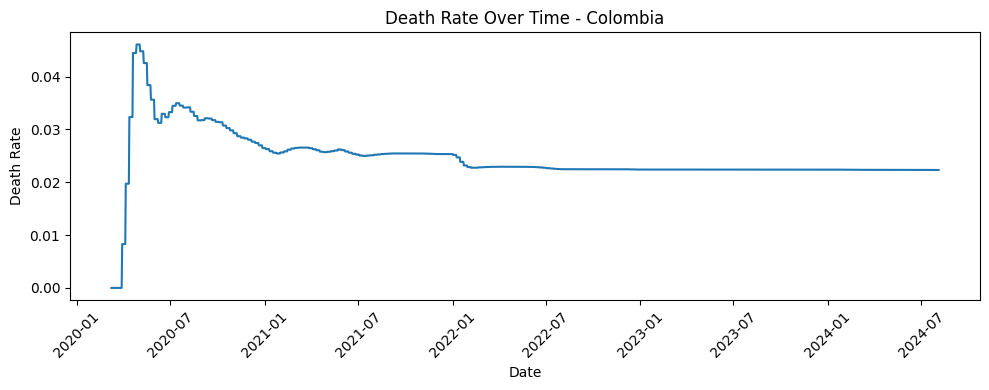

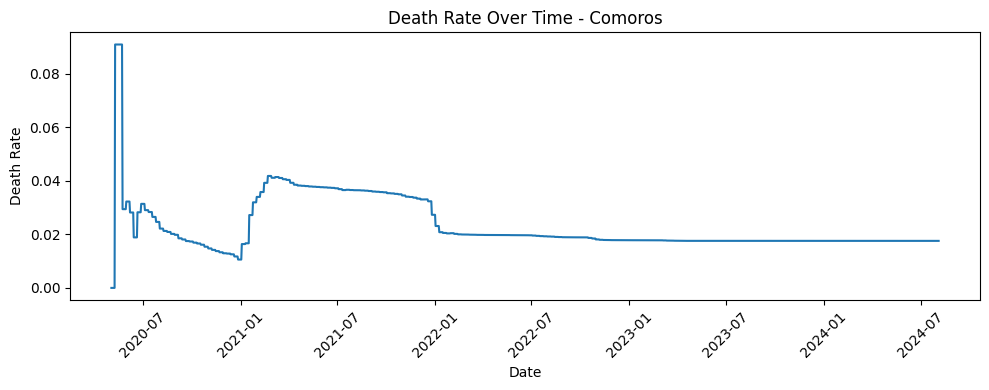

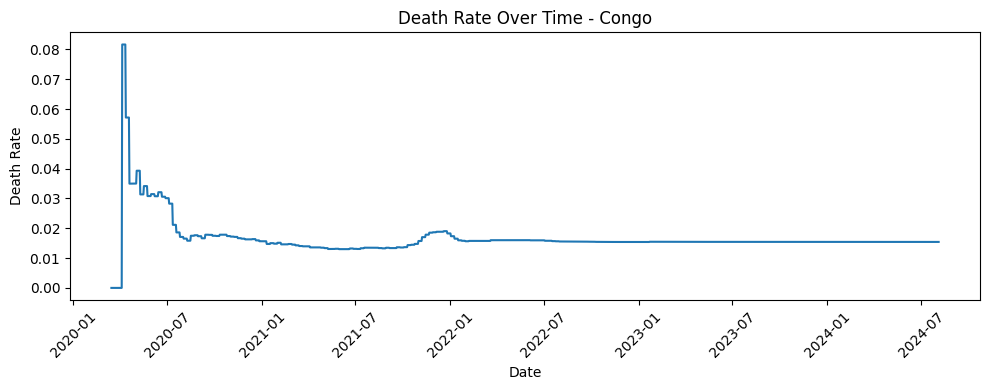

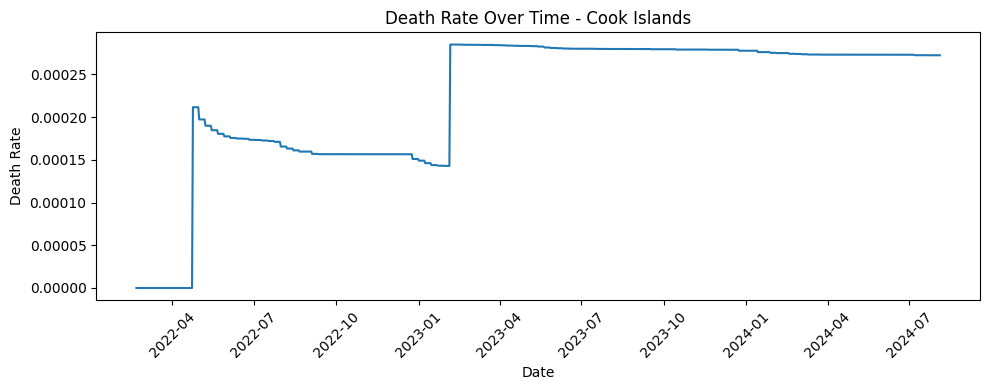

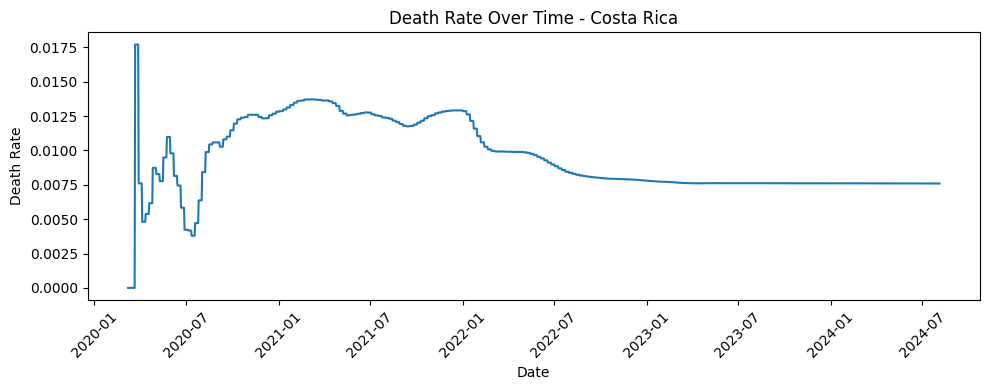

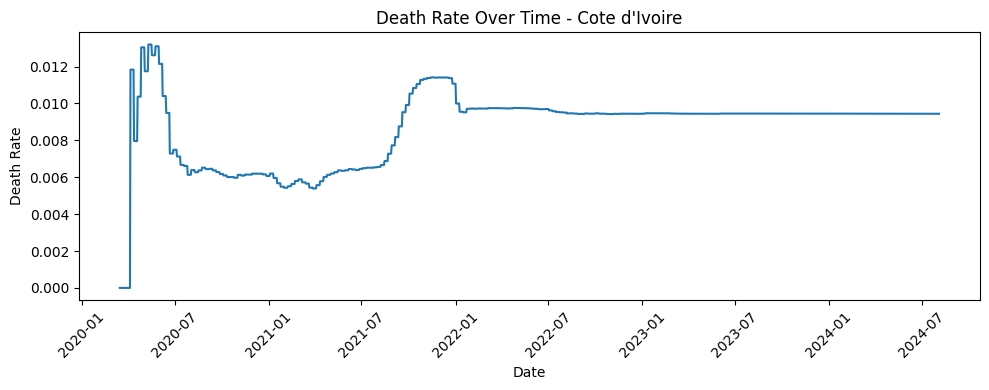

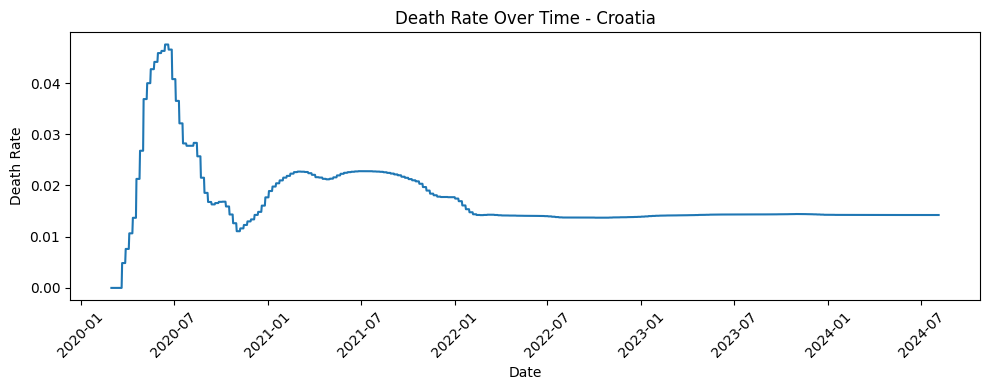

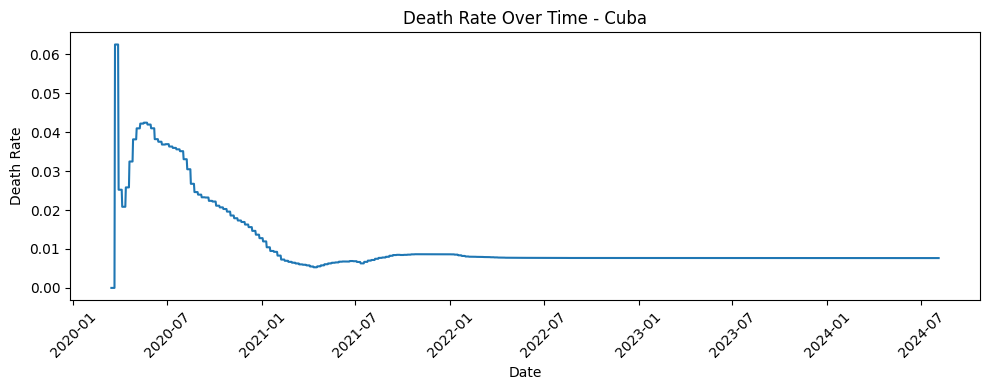

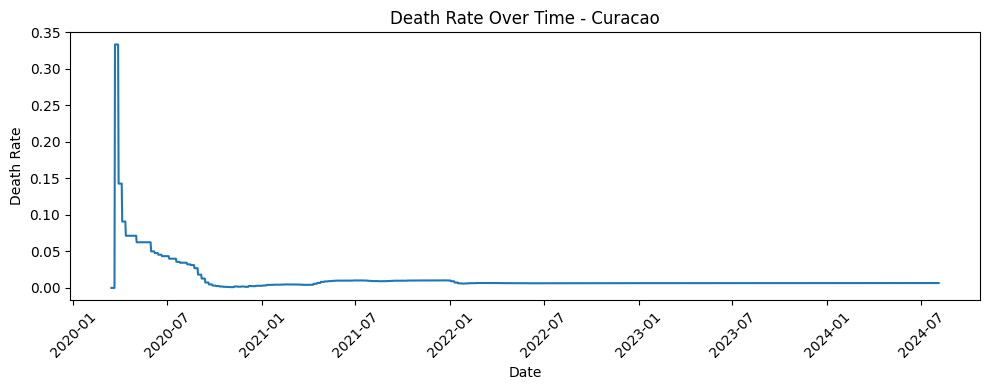

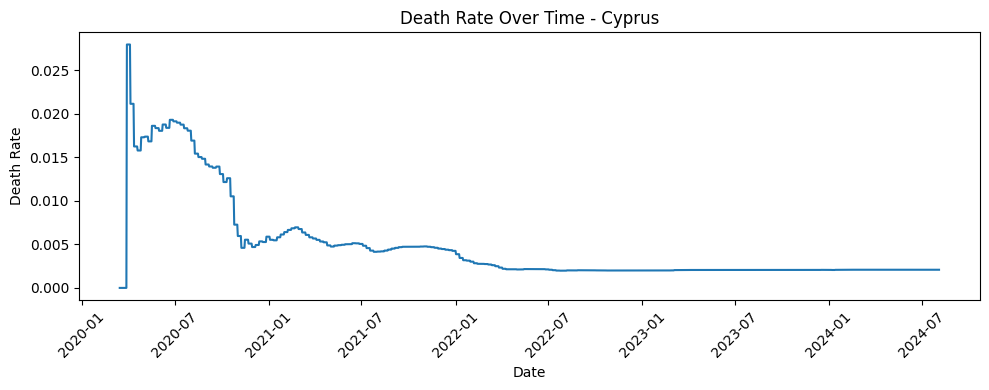

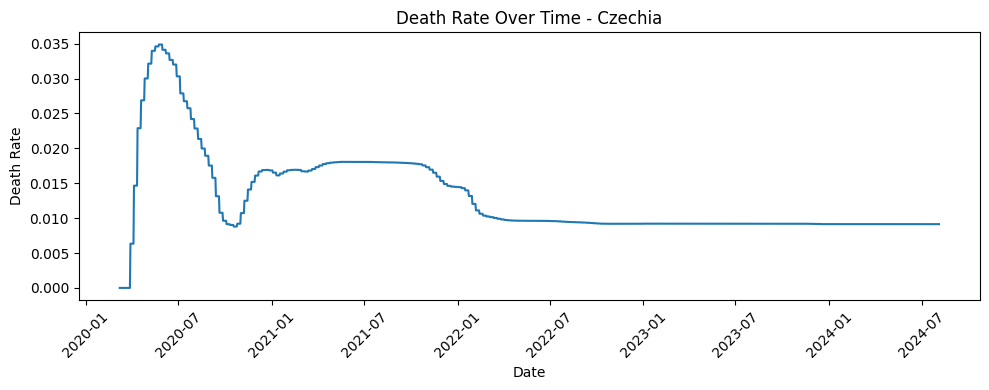

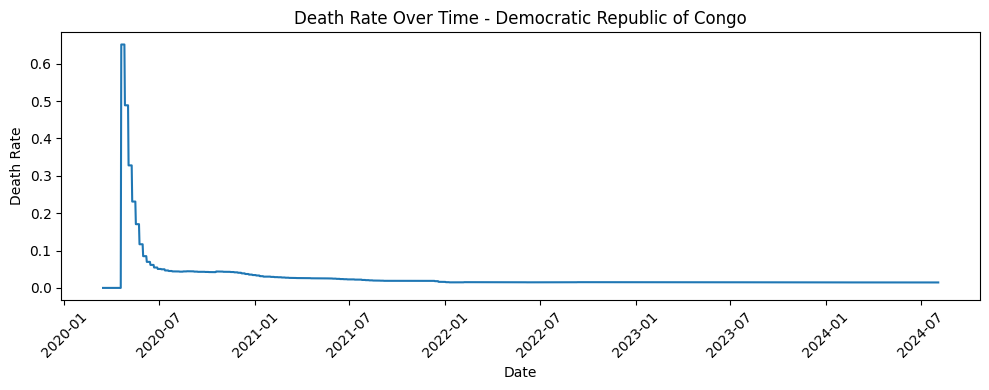

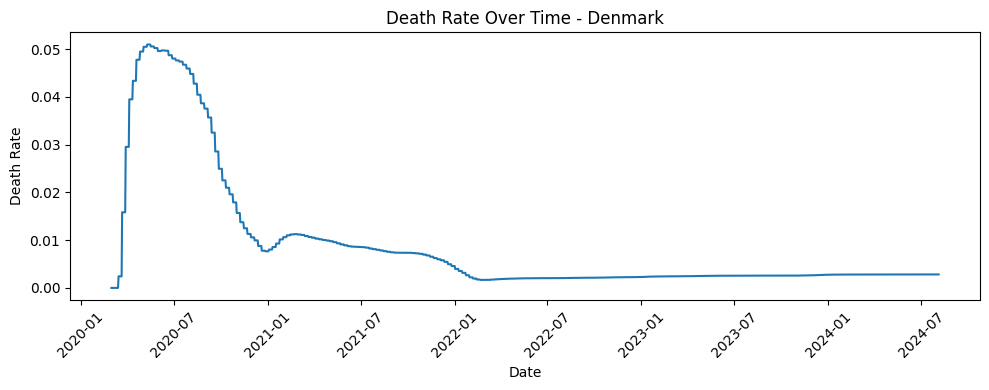

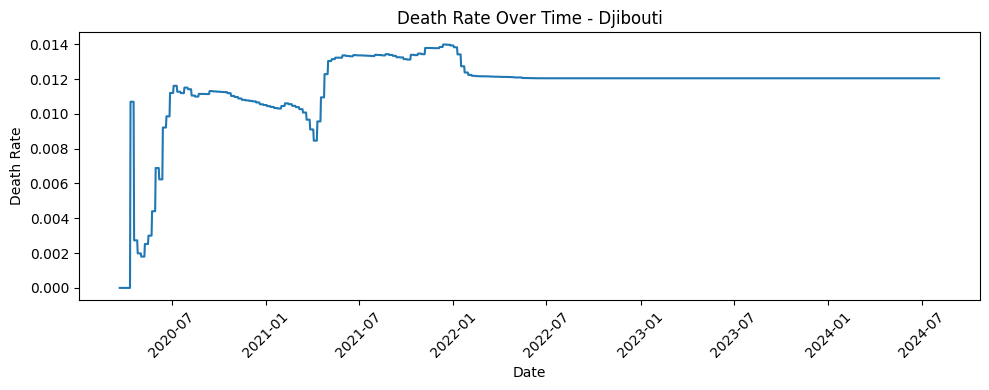

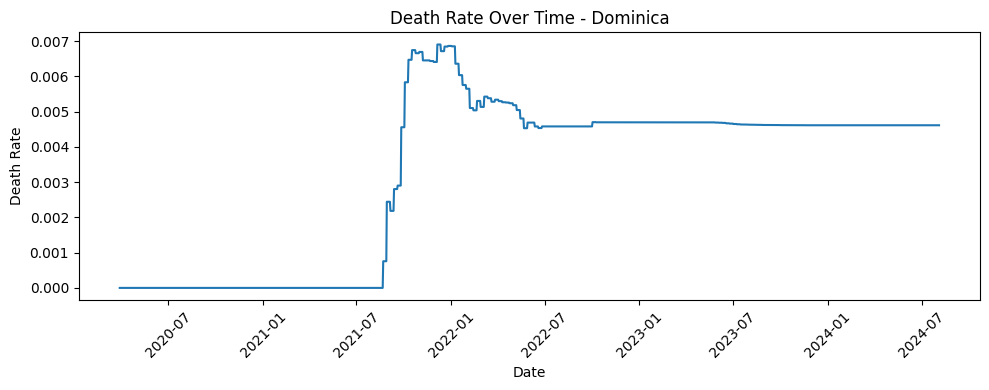

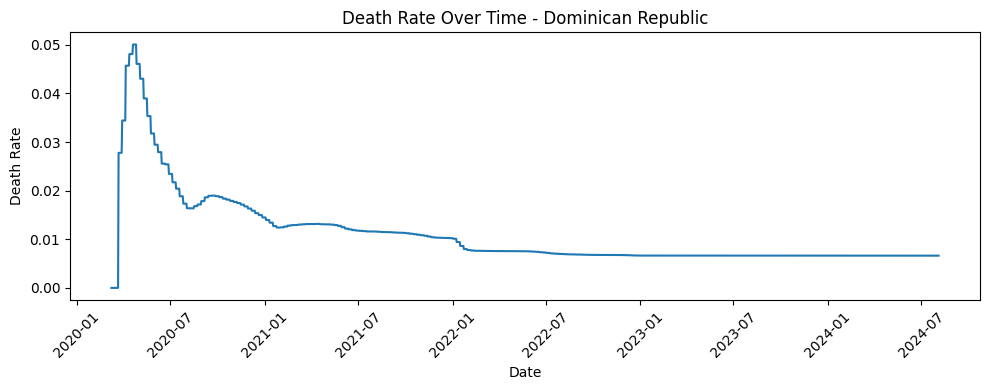

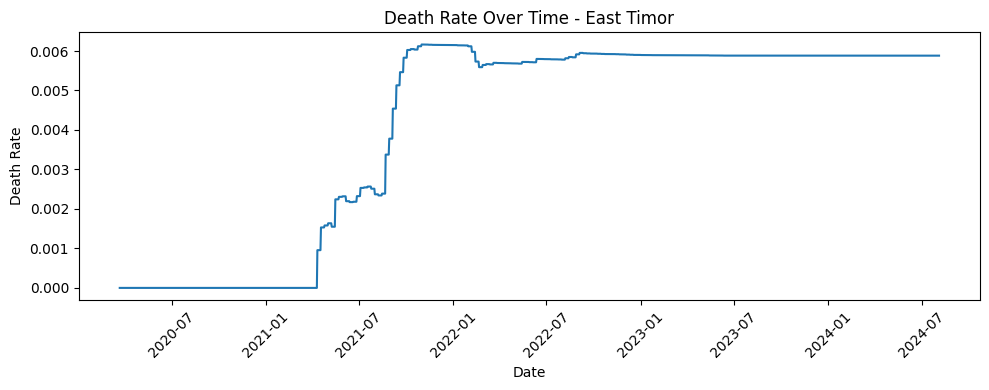

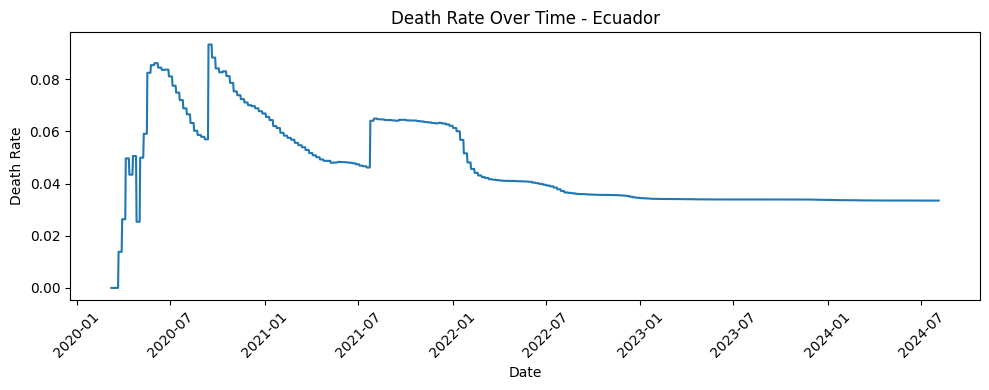

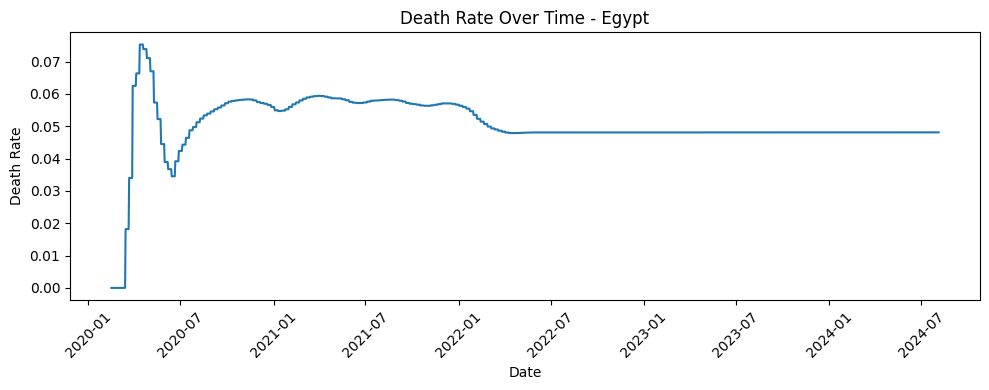

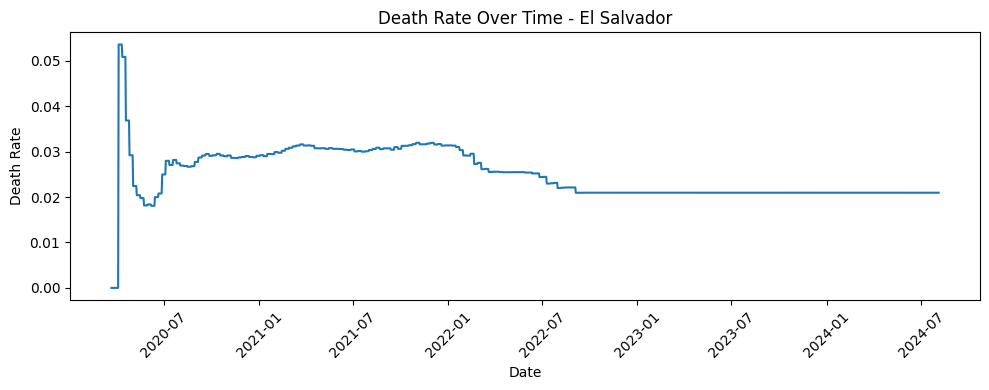

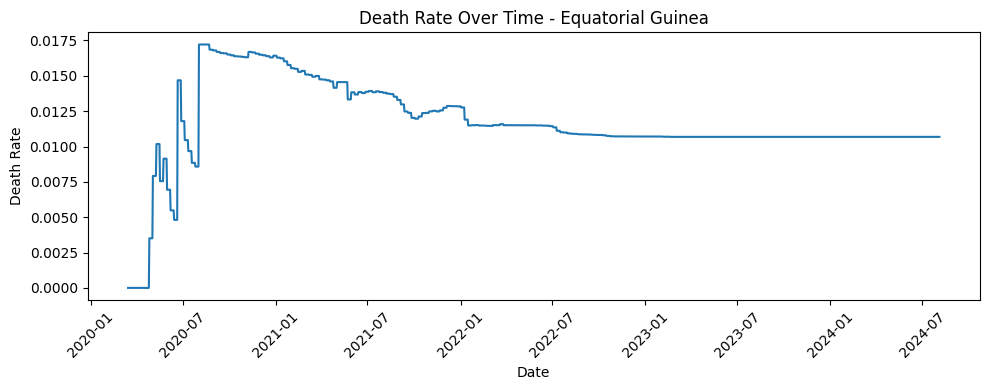

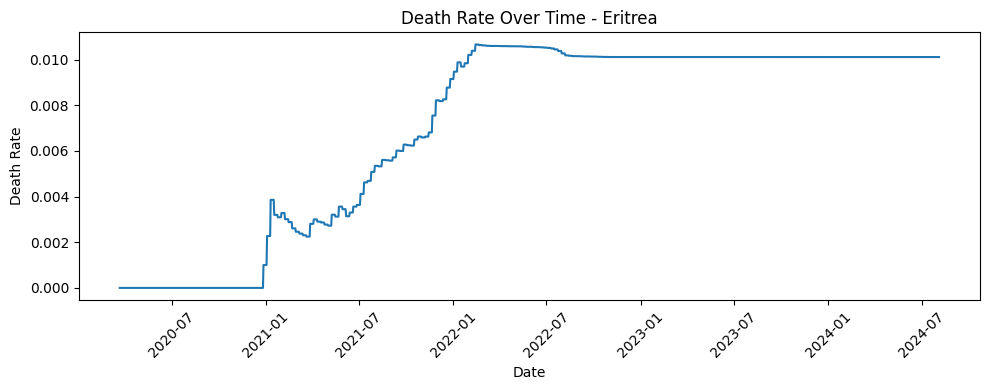

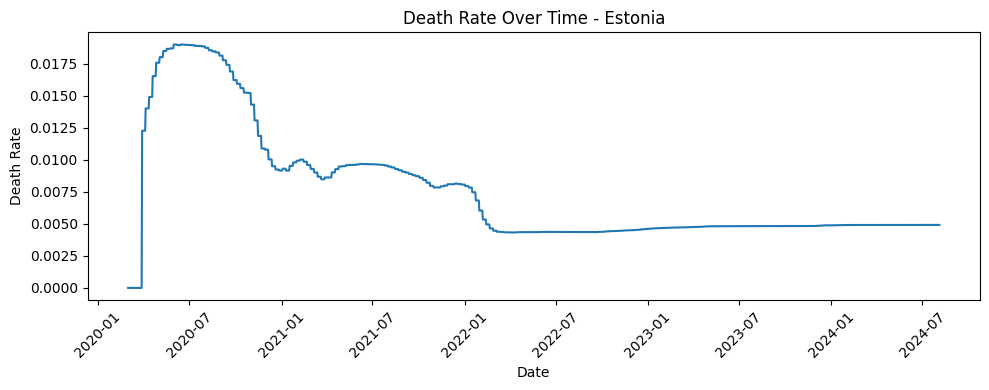

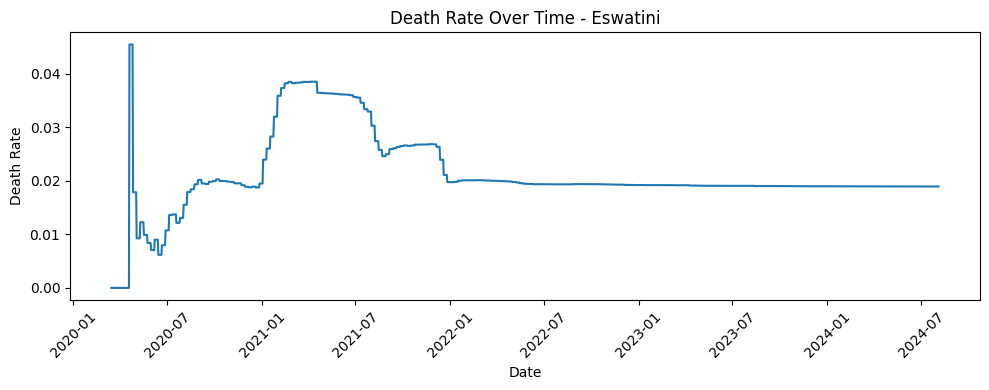

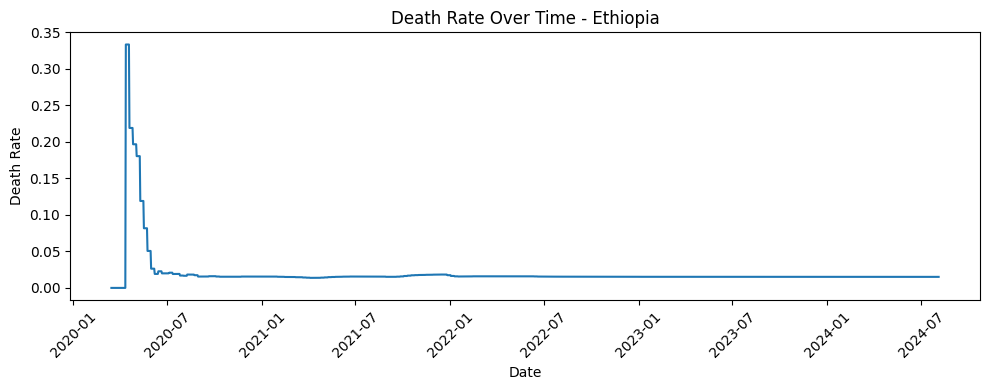

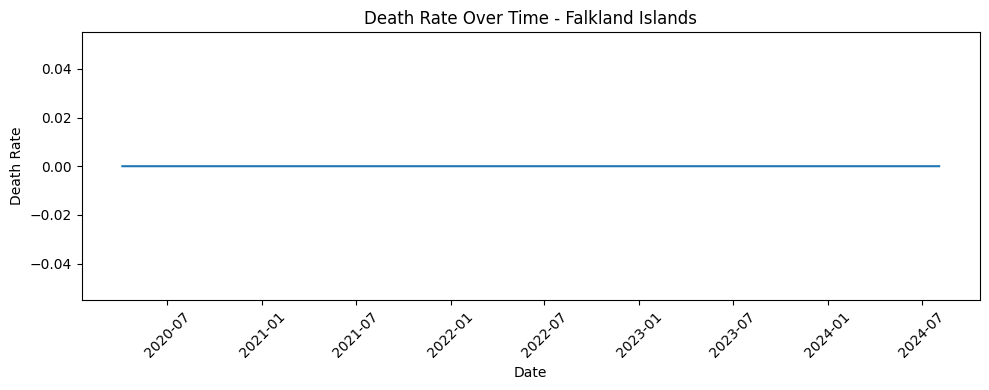

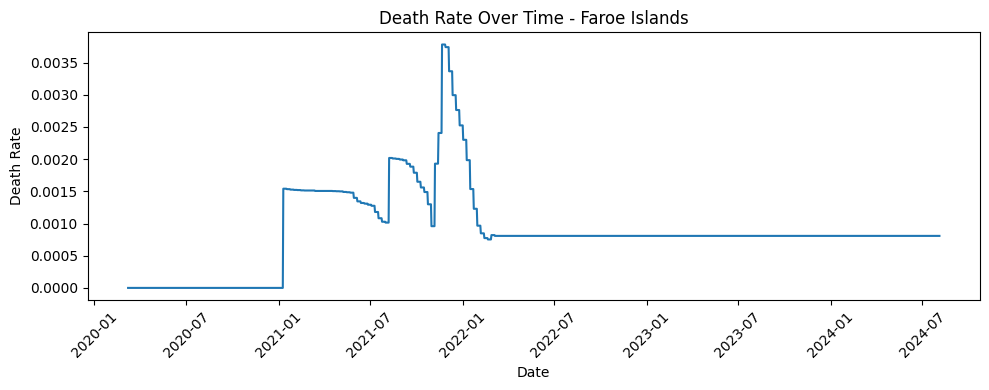

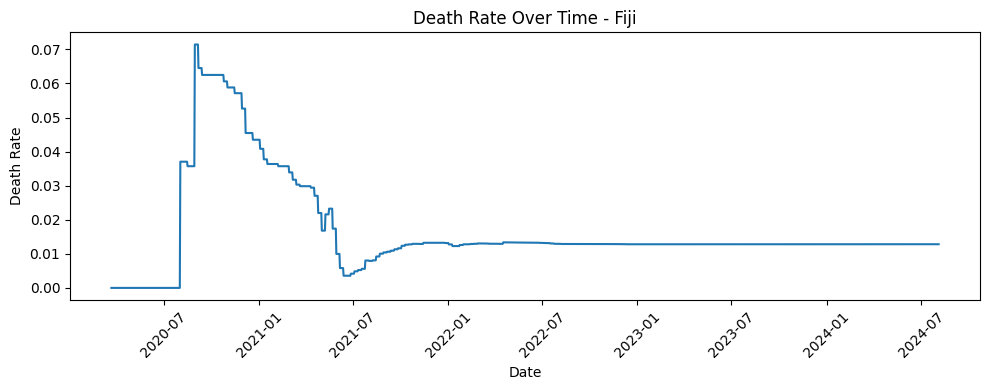

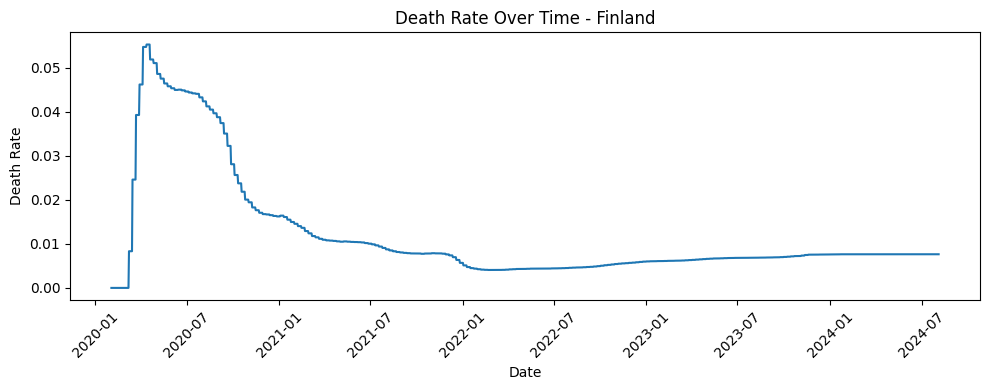

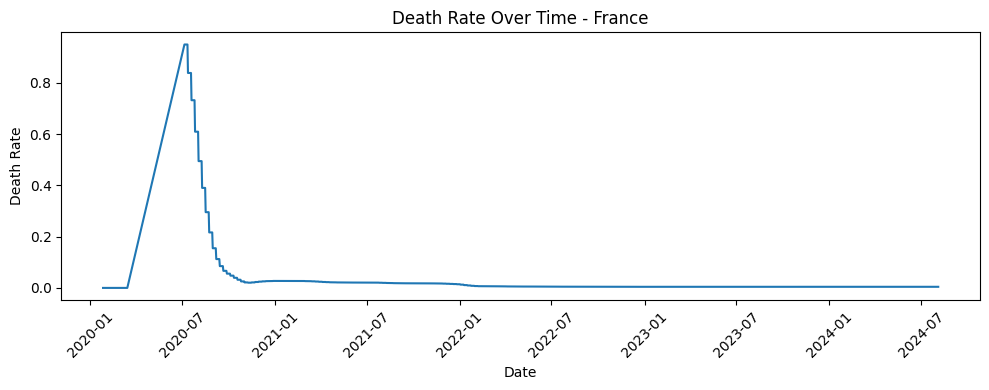

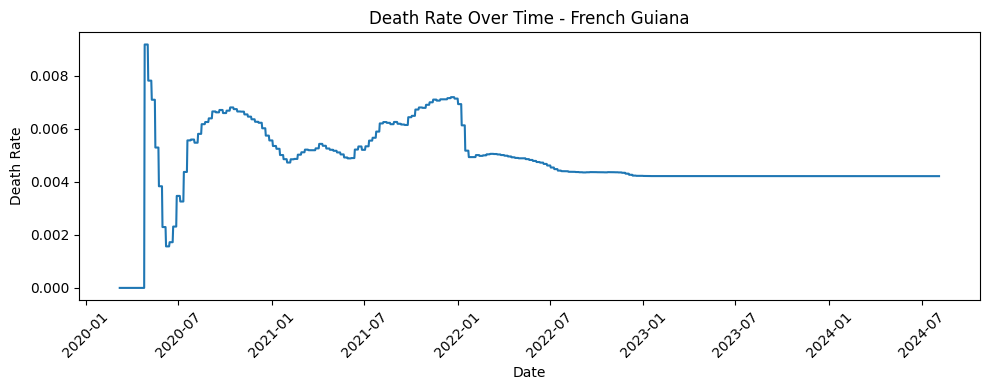

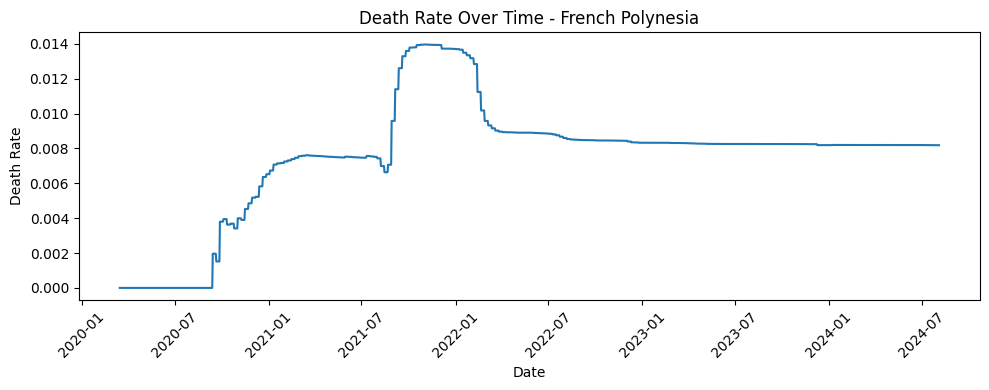

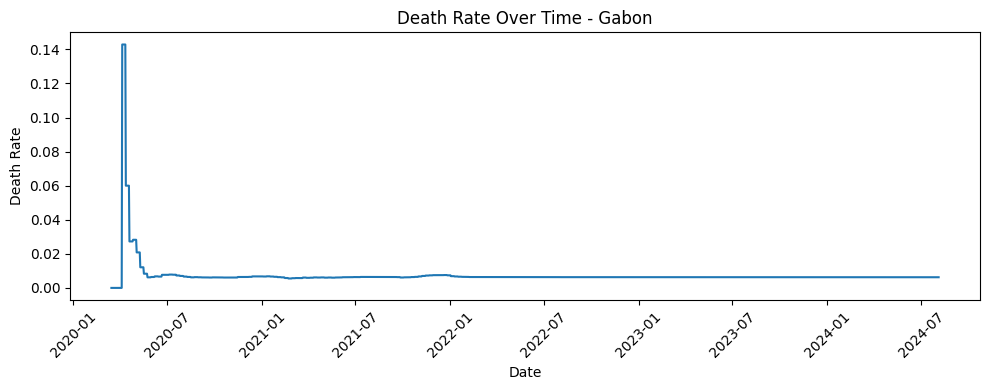

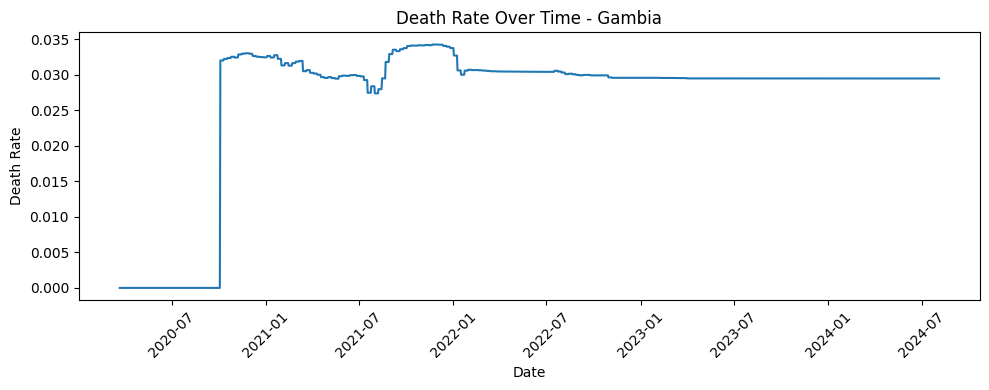

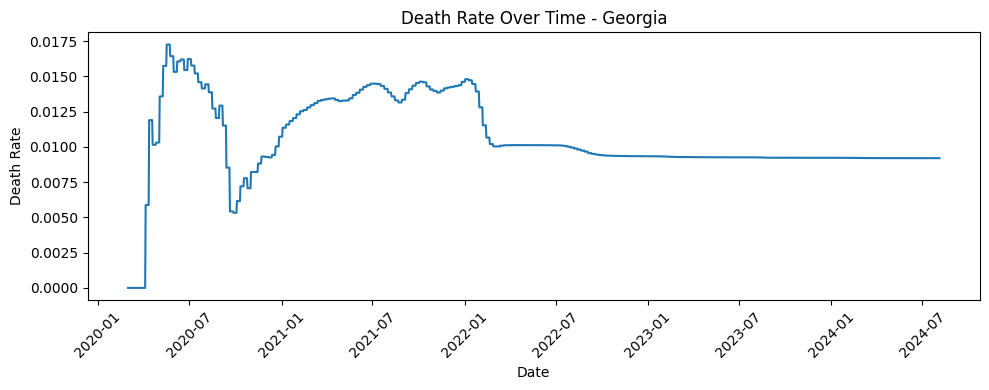

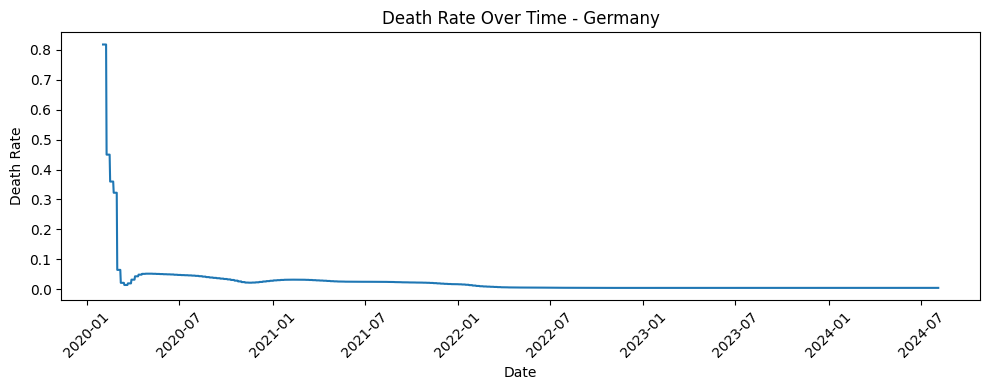

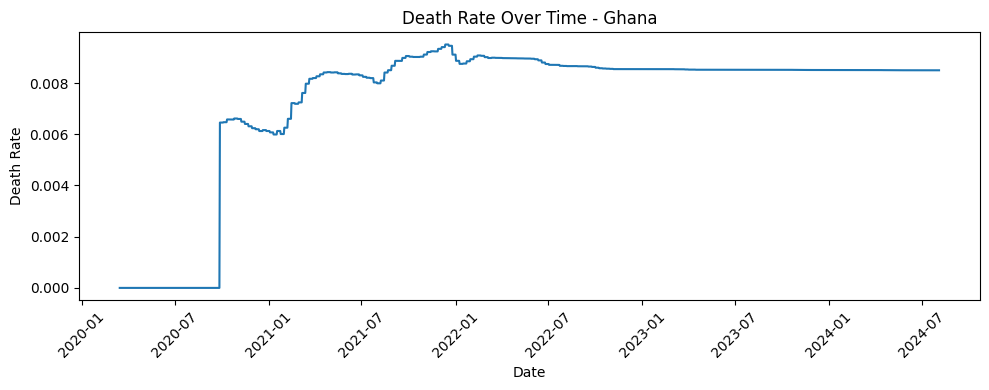

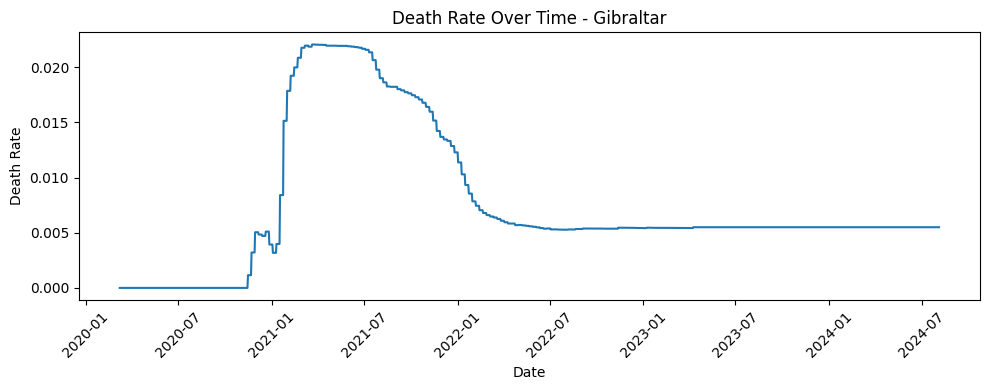

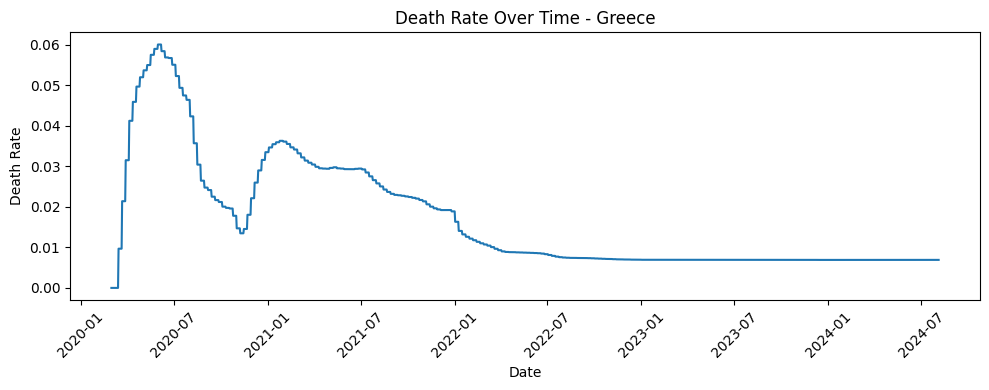

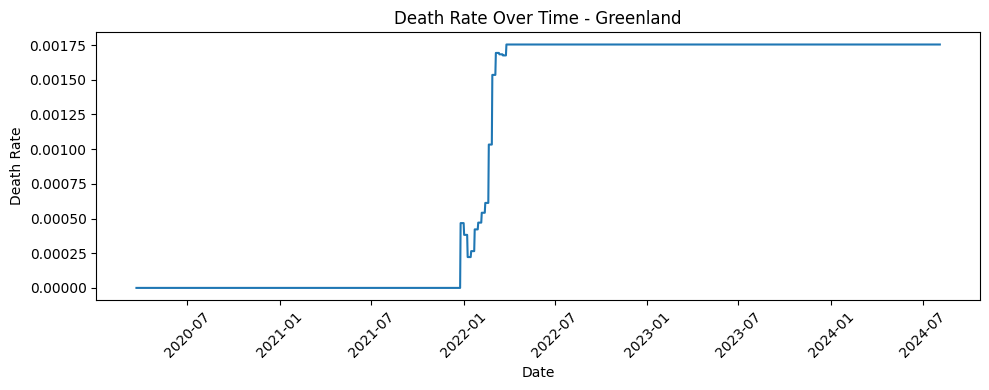

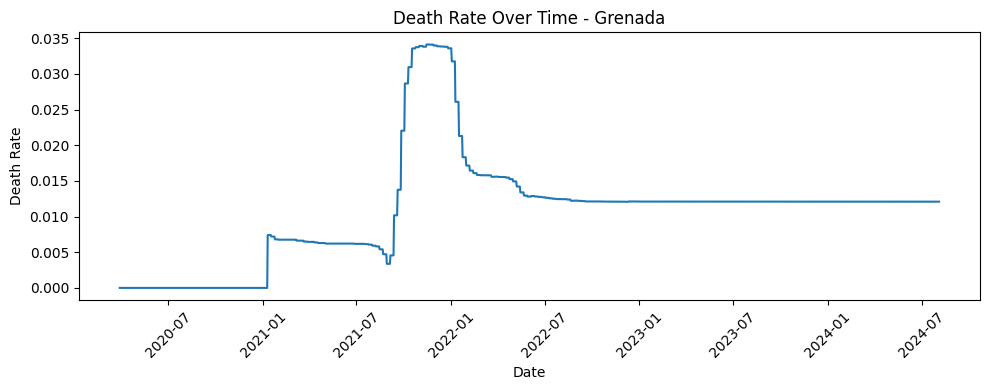

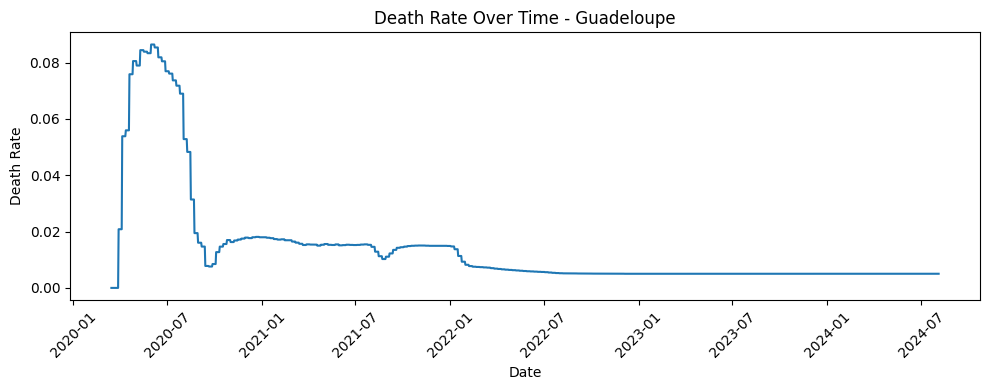

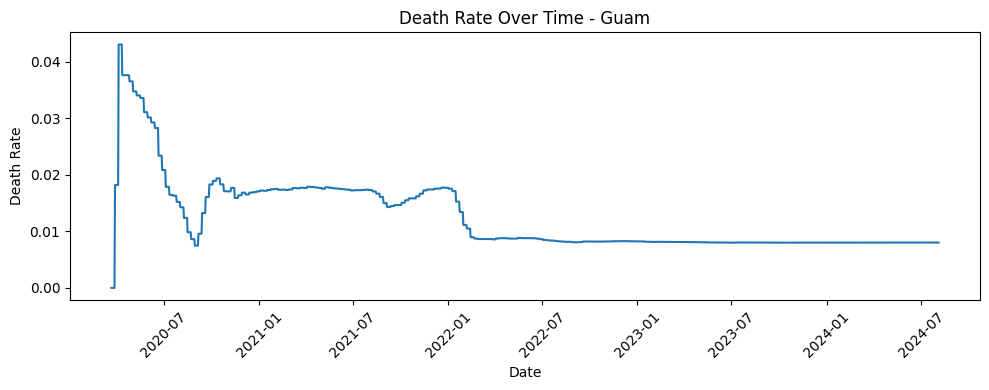

In [ ]:
import matplotlib.pyplot as plt

# نفترض إنو عندك عمود death_rate وعمود date موجودين وجاهزين، ونوع date صحيح
unique_countries = df["location"].unique()

for country in unique_countries:
    df_country = df[df["location"] == country]
    plt.figure(figsize=(10, 4))
    plt.plot(df_country["date"], df_country["death_rate"], label=country)
    plt.title(f'Death Rate Over Time - {country}')
    plt.xlabel('Date')
    plt.ylabel('Death Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df_date_sorted = df.sort_values("date").drop_duplicates("location", keep="last")

df_top_10 = df_date_sorted[["location", "death_rate"]].dropna().sort_values(ascending=False, by="death_rate").head(10)
